In [ ]:
import pandas as pd
import string
import spacy
import collections

from collections import Counter
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [ ]:
# Load the spaCy language model for English
nlp_en = spacy.load("en_core_web_sm")

In [ ]:
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the Portuguese language model
# https://spacy.io/models/pt
nlp = spacy.load('pt_core_news_lg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
comments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/csv/grupos_discordancia.csv')

In [ ]:
len(comments_df)

2000

In [ ]:
# Contar o número de duplicatas
num_duplicates = comments_df.duplicated().sum()

print(f"Número de duplicatas: {num_duplicates}")

Número de duplicatas: 0


In [ ]:
neutro_comments = comments_df[comments_df['class_result'] == 0]
negativo_comments = comments_df[comments_df['class_result'] == -1]
positivo_comments = comments_df[comments_df['class_result'] == 1]
ns_comments = comments_df[comments_df['class_result'] == 10]
dis_comments = comments_df[comments_df['class_result'] == -10]

In [ ]:
#comments_df = comments_df.drop('Comentário_y', axis=1)
#comments_df = comments_df.drop('Comentário', axis=1)
#comments_df = comments_df.drop('Comentários adicionais_x', axis=1)
#comments_df = comments_df.drop('Comentários adicionais_y', axis=1)
#comments_df = comments_df.drop('Comentários adicionais', axis=1)
#comments_df = comments_df.rename(columns={'Comentário_x': 'Comentário'})
#comments_df.to_csv('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/csv/grupos_com_n_sei_separado.csv', encoding='utf-8', index=False)

In [ ]:
comments_df

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement
0,0,hr39bh3,"Olha, vou falar sobre a minha experiência. Fui...",-1,-1,-1,-1,1
1,1,hr4zdgd,Intervencionismo externo visando ganho próprio...,-1,-1,-1,-1,1
2,2,hr673em,AWS é vida!! Hehehe\nUso e recomendo o todos o...,1,1,1,1,1
3,3,hrd2klr,"Se fosse assim, quem morrer de parada cardíaca...",-1,-1,0,-1,0
4,4,hrflhlt,"Em momentos como o atual, tomar medidas de pre...",1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
1995,495,j1me21f,Win-win ao meu ver,0,1,1,1,0
1996,496,j1rpqpg,"O exército vermelho era foda, pai! Os Snipers ...",1,-1,1,1,0
1997,497,j21u2z0,"Oushe, se você sustenta sua mãe, ela não tem p...",10,-1,0,-10,0
1998,498,j24w0rk,"Porra Muzzy, depois que eu vi o jeito que ele ...",-1,-1,-1,-1,1


In [ ]:
comments_df['class_result'].value_counts(normalize=True)

class_result
-1     0.4775
 0     0.2310
 1     0.1610
-10    0.1020
 10    0.0285
Name: proportion, dtype: float64

In [ ]:
comments_df['class_result'].value_counts()

class_result
-1     961
 0     419
 1     326
-10    211
 10     83
Name: count, dtype: int64

In [ ]:
comments_df.groupby('subreddit')['is_toxic'].value_counts(normalize=True)

subreddit       is_toxic
botecodoreddit  0           0.877372
                1           0.122628
brasil          0           0.905568
                1           0.094432
brasilivre      0           0.868791
                1           0.131209
conversas       0           0.944242
                1           0.055758
desabafos       0           0.880227
                1           0.119773
eu_nvr          0           0.883796
                1           0.116204
futebol         0           0.891887
                1           0.108113
investimentos   0           0.960482
                1           0.039518
saopaulo        0           0.943745
                1           0.056255
tiodopave       0           0.979592
                1           0.020408
Name: is_toxic, dtype: float64

### Linguistics analysis

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
english_stop_words = set(stopwords.words("english"))

In [ ]:
if 'algum' in set(stopwords.words('portuguese')):
  print(1)

In [ ]:
stop_words = list(
    set(stopwords.words('portuguese')).union(set(nlp.Defaults.stop_words))
)

In [ ]:
if 'outro' in set(nlp.Defaults.stop_words):
  print(1)

In [ ]:
stop_words = list(set(stop_words).union(set(english_stop_words)))

In [ ]:
stop_words.append('que')
stop_words.append('pra')
stop_words.append('o')
stop_words.append('eu')
stop_words.append('voce')
stop_words.append('você')
stop_words.append('vc')
stop_words.append('q')
stop_words.append('pq')
stop_words.append('n')
stop_words.append('ta')
stop_words.append('tá')
stop_words.append('pro')
stop_words.append('acho')
stop_words.append('2')
stop_words.append('nao')
stop_words.append('kkk')
stop_words.append('kkkk')
stop_words.append('kkkkk')
stop_words.append('kkkkkk')
stop_words.append('100')
stop_words.append('cara')
stop_words.append('achar')
stop_words.append('falar')
stop_words.append('pessoa')

In [ ]:
stop_words

In [ ]:
len(stop_words)

697

In [ ]:
if 'outros' in stop_words:
  print(1)
else:
  print(2)

1


### Comments text cleaning (v2)

In [ ]:
!pip install emoji==1.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=b3bff02a587e38ac2db549c008fc998ce909d38ca6a406bc8433a17e8c4b1e20
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import re
import emoji
from dateutil.parser import parse

In [ ]:
def clean_comment(comment):
    # Remove links
    comment = re.sub(r'http\S+', '', comment)

    # Remove laughter expressions like "kkkk" and "haha"
    comment = re.sub(r'\b(kk+)\b', '', comment, flags=re.IGNORECASE)
    comment = re.sub(r'\b(ha+h[ha]*)\b', '', comment, flags=re.IGNORECASE)

    doc = nlp(comment)

    cleaned_tokens = []
    last_token = None

    for token in doc:
        if token.is_alpha and not token.is_stop and token.text not in stop_words:
            # Remove repeated symbols
            if last_token is None or token.text != last_token:
                # cleaned_tokens.append(token.text.lower())
                cleaned_tokens.append(token.lemma_.lower().strip())
            last_token = token.text

    cleaned_comment = " ".join(cleaned_tokens)
    return cleaned_comment

In [ ]:
# Example usage
reddit_comment = """
/u/user123 mentioned this in r/python. Check out this link: https://example.com.
#Python #Programming 😄
> This is a quoted text.
"""
replaced_comment = clean_comment(reddit_comment)
print(replaced_comment)

mentioned r python check link python programming this quoted text


In [ ]:
def clean_comment_v2(comment):
    # Replace links
    comment = re.sub(r'http\S+', '<URL>', comment)

    # Replace mentions and usernames with 'MENTION'
    ccomment = re.sub(r'@\w+', '<MENTION>', comment)

    # comment = re.sub(r'\b\d+\b', '<NUMBER>', comment)

    # Replace hashtags with 'HASHTAG'
    comment = re.sub(r'#(\w+)', r'<HASHTAG>', comment)

    # Replace emojis with 'EMOJI'
    comment = ''.join(['<EMOJI>' if c in emoji.UNICODE_EMOJI['en'] else c for c in comment])

    # Replace quoted text with 'QUOTED_TEXT'
    comment = re.sub(r'^\s*>[^\n]*', r'<QUOTED_TEXT>', comment, flags=re.MULTILINE)

    # Replace references to time and dates with 'DATE'
    date_mentions = re.findall(r'\b\d{1,2}[\-\/]\d{1,2}[\-\/]\d{2,4}\b', comment)
    for date in date_mentions:
        parsed_date = str(parse(date).date())
        comment = comment.replace(date, '<DATE>')

    # Remove laughter expressions like "kkkk" and "haha"
    comment = re.sub(r'\b(kk+)\b', '', comment, flags=re.IGNORECASE)
    comment = re.sub(r'\b(ha+h[ha]*)\b', '', comment, flags=re.IGNORECASE)

    doc = nlp(comment)

    cleaned_tokens = []
    last_token = None

    for token in doc:
        if token.is_alpha and token.text.lower() not in stop_words:
            # Remove repeated symbols
            if last_token is None or token.text != last_token:
                # cleaned_tokens.append(token.text.lower())
                cleaned_tokens.append(token.text.lower().strip())
            last_token = token.text

    cleaned_comment = " ".join(cleaned_tokens)
    return cleaned_comment

In [ ]:
# Example usage
reddit_comment = """
/u/user123 mentioned this in r/python. Check out this link: https://example.com.
#Python #Programming 😄
> This is a quoted text.
"""
replaced_comment = clean_comment_v2(reddit_comment)
print(replaced_comment)

mentioned r python check link url hashtag emoji


In [ ]:
# comments_df['cleaned_comment'] = comments_df['body'].apply(lambda c: clean_comment(c))

In [ ]:
comments_df['cleaned_comment_v2'] = comments_df['Comentário'].apply(lambda c: clean_comment_v2(c))

In [ ]:
cp_comments = comments_df[comments_df['cleaned_comment_v2'] == ''].copy()

In [ ]:
len(cp_comments)

19

In [ ]:
cp_comments['class_result'].value_counts()

class_result
 1     7
 0     6
 10    4
-10    1
-1     1
Name: count, dtype: int64

In [ ]:
antes = list(comments_df['class_result'].value_counts())

In [ ]:
depois = (comments_df[comments_df['cleaned_comment_v2'] != '']['class_result'].value_counts())

In [ ]:
len(comments_df)

2000

In [ ]:
for a in antes:
  print(a * 100 / len(comments_df), a)

48.05 961
20.95 419
16.3 326
10.55 211
4.15 83


In [ ]:
depois = (comments_df[comments_df['cleaned_comment_v2'] != '']['class_result'].value_counts())

In [ ]:
sum(depois)

1981

In [ ]:
for a in depois:
  print(a * 100 / sum(depois), a)

48.460373548712774 960
20.848056537102472 413
16.102978293791015 319
10.60070671378092 210
3.987884906612822 79


In [ ]:
# Save cleaned data to avoid executing this step multiple times (optional)
# comments_df.to_csv('./drive/MyDrive/reddit_data/comments/samples/processed/comments_processed_100k_v2.csv', index=False)

#### Comments length distribution

In [ ]:
significance_level = 0.05

In [ ]:
comments_df['comment_len'] = comments_df['cleaned_comment_v2'].apply(lambda c: len(c))

In [ ]:
comments_df = comments_df[comments_df['comment_len'] > 0]

In [ ]:
len(comments_df)

1981

In [ ]:
comments_df['class_result'].value_counts()

class_result
-1     960
 0     413
 1     319
-10    210
 10     79
Name: count, dtype: int64

In [ ]:
comments_df.groupby('class_result').agg({'comment_len': ['mean', 'median']})

comment_len       
                    mean median
class_result                   
-10            79.952381   43.0
-1             98.427083   57.0
 0             81.443099   38.0
 1             99.235110   44.0
 10            43.000000   21.0

In [ ]:
comments_df[comments_df['class_result'] == 0]

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,comment_len
7,7,hs49oxz,Não disse que não ia gostar,1,0,0,0,0,disse ia gostar,15
8,8,hs9tiar,Veja no seu prédio quanto costumam cobrar... A...,0,0,0,0,1,prédio costumam cobrar vaga,27
9,9,hshrlwk,Raw (2016),0,0,0,0,1,raw,3
10,10,hsjgsqf,quais cursos você fez?,0,0,0,0,1,cursos,6
11,11,hsm5fg1,"Para mim, ele é branco.",10,0,0,0,0,mim branco,10
...,...,...,...,...,...,...,...,...,...,...
1963,463,iz0k83o,Eu lavo as minhas mãos rapá. Culpa do carinha ...,-1,0,0,0,0,lavo mãos rapá culpa carinha torcida plaquinha,46
1965,465,iz1qddg,Gosto de chiclete é enjoado.,0,0,-1,0,0,gosto chiclete enjoado,22
1969,469,ize1nop,"eu não ia estourar, tem gente que fala até que...",0,-1,0,0,0,ia estourar gente fala atrapalha fiz né,39
1977,477,izqc5yj,Lógico que desabou kkkkk,10,0,0,0,0,lógico desabou,14


In [ ]:
neutro_comments = comments_df[comments_df['class_result'] == 0]['comment_len']
negativo_comments = comments_df[comments_df['class_result'] == -1]['comment_len']
positivo_comments = comments_df[comments_df['class_result'] == 1]['comment_len']
ns_comments = comments_df[comments_df['class_result'] == 10]['comment_len']
dis_comments = comments_df[comments_df['class_result'] == -10]['comment_len']

In [ ]:
neutro_data = (neutro_comments.tolist(),)
negativo_data = (negativo_comments.tolist(),)
positivo_data = (positivo_comments.tolist(),)
ns_data = (ns_comments.tolist(),)
dis_data = (dis_comments.tolist(),)

In [ ]:
bootstrap_ci_ns = st.bootstrap(
    ns_data,
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

bootstrap_ci_neutro = st.bootstrap(
    neutro_data,
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

bootstrap_ci_negativo = st.bootstrap(
    negativo_data,
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

bootstrap_ci_positivo = st.bootstrap(
    positivo_data,
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)
bootstrap_ci_positivo.confidence_interval

bootstrap_ci_dis = st.bootstrap(
    dis_data,
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)


In [ ]:
bootstrap_ci_dis.bootstrap_distribution.mean()

80.01023102310232

In [ ]:
bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=66.80309523809524, high=95.12976190476189)

In [ ]:
bootstrap_ci_ns.bootstrap_distribution.mean()

43.12710891342299

In [ ]:
bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=29.075949367088608, high=60.15316455696201)

In [ ]:
bootstrap_ci_neutro.bootstrap_distribution.mean()

81.4125177650937

In [ ]:
bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=69.65375302663438, high=94.44794188861985)

In [ ]:
bootstrap_ci_negativo.bootstrap_distribution.mean()

98.46031915691569

In [ ]:
bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=90.57468750000001, high=106.65885416666666)

In [ ]:
bootstrap_ci_positivo.bootstrap_distribution.mean()

99.12803380651546

In [ ]:
bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=80.11238244514107, high=122.28244514106582)

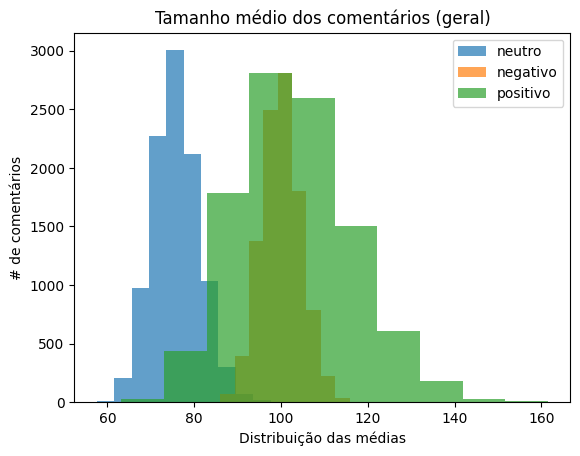

In [ ]:
plt.hist(bootstrap_ci_neutro.bootstrap_distribution, alpha=0.7, label='neutro')
plt.hist(bootstrap_ci_negativo.bootstrap_distribution, alpha=0.7, label='negativo')
plt.hist(bootstrap_ci_positivo.bootstrap_distribution, alpha=0.7, label='positivo')

plt.title('Tamanho médio dos comentários (geral)')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

In [ ]:
 significance_level

0.05

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(dis_comments, negativo_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 85373.5
P-value: 0.0005050583011582939
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(dis_comments, positivo_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 32851.5
P-value: 0.7085218891611214
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(dis_comments, neutro_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 45939.5
P-value: 0.22545022834690187
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(neutro_comments, negativo_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 157353.5
P-value: 1.2914304627458915e-09
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(neutro_comments,positivo_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 60678.0
P-value: 0.06704094678672515
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(positivo_comments, negativo_comments)

# Interpret the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 133061.0
P-value: 0.000448613944861762
Is significant? True


In [ ]:
'''
O teste de Mann-Whitney U é apropriado se você quer comparar as medianas do tamanho dos comentários entre dois grupos independentes (por exemplo, comentários neutros e comentários tóxicos) para ver se um grupo tende a ter comentários mais longos ou mais curtos que o outro.
Aplicação

    Formulação das Hipóteses:
        Hipótese Nula (H0H0​): Não há diferença na mediana do tamanho dos comentários entre os dois grupos.
        Hipótese Alternativa (H1H1​): Há uma diferença na mediana do tamanho dos comentários entre os dois grupos.

    Realização do Teste:
        Calcule a soma dos ranks para os tamanhos dos comentários nos dois grupos combinados.
        Use a estatística U para determinar a significância da diferença nas medianas.

    Interpretação:
        Se o valor p for menor que o nível de significância (αα), rejeite H0H0​. Isso indica que há uma diferença significativa nas medianas dos tamanhos dos comentários entre os dois grupos.
Teste de Kolmogorov-Smirnov (KS) para Duas Amostras
Propósito no Contexto

O teste KS é apropriado se você quer comparar as distribuições completas dos tamanhos dos comentários entre os dois grupos para ver se há diferenças na forma das distribuições (não apenas na mediana, mas também na dispersão e forma).
Aplicação

    Formulação das Hipóteses:
        Hipótese Nula (H0H0​): As distribuições dos tamanhos dos comentários são as mesmas para os dois grupos.
        Hipótese Alternativa (H1H1​): As distribuições dos tamanhos dos comentários são diferentes para os dois grupos.

    Realização do Teste:
        Calcule as funções de distribuição cumulativa empírica (ECDF) para os tamanhos dos comentários em ambos os grupos.
        Use a estatística KS para determinar a maior diferença entre as ECDFs dos dois grupos.

    Interpretação:
        Se o valor p for menor que o nível de significância (αα), rejeite H0H0​. Isso indica que há uma diferença significativa nas distribuições dos tamanhos dos comentários entre os dois grupos.
'''

#### Pos-tagging distribution

In [ ]:
def analyze_pos_distribution(text_corpus):
    # Process the text corpus with the Portuguese language model
    docs = list(nlp.pipe(text_corpus))

    # Initialize a counter to count the occurrences of each POS tag
    pos_counter = collections.Counter()

    # Count the occurrences of each POS tag in the corpus
    for doc in docs:
        for token in doc:
            pos_counter[token.pos_] += 1

    return pos_counter

In [ ]:
comments_neutros = comments_df[comments_df['class_result'] == 0]['cleaned_comment_v2']
comments_negativos = comments_df[comments_df['class_result'] == -1]['cleaned_comment_v2']
comments_positivos = comments_df[comments_df['class_result'] == 1]['cleaned_comment_v2']
comments_ns = comments_df[comments_df['class_result'] == 10]['cleaned_comment_v2']
comments_dis = comments_df[comments_df['class_result'] == -10]['cleaned_comment_v2']

In [ ]:
def on_text(text_corpus):
    # Process the text corpus with the Portuguese language model
    docs = list(nlp.pipe(text_corpus))

    # Initialize a counter to count the occurrences of each POS tag
    pos_counter_verb = collections.Counter()
    pos_counter_noun = collections.Counter()
    pos_counter_adj = collections.Counter()

    # Count the occurrences of each POS tag in the corpus
    for doc in docs:
        for token in doc:
          if token.pos_ == 'DET':
            print(token.text, token.pos_)


In [ ]:
on_text(comments_negativos)

alguma DET
fdps DET
outro DET
santos DET
alguma DET
alguma DET
alguma DET
várias DET
outro DET
algum DET
outro DET
nenhum DET
emoji DET
muita DET
mt DET
algum DET
muita DET
cheios DET
alguma DET
alguma DET
outro DET
alguma DET
muitas DET
nenhum DET
contigo DET
muita DET
marmita DET
algum DET
alguma DET
hum DET
murro DET
certo DET
alguém DET
nenhum DET
nenhum DET
outro DET
certo DET
diversas DET
várias DET
certo DET
nenhum DET
própria DET
monte DET
tantas DET
próprios DET
certo DET
algum DET
alguma DET
certa DET
certo DET
alguma DET
sue DET
algum DET
alguém DET
algum DET
alguma DET
certo DET
mt DET
nariz DET
próprios DET
alguma DET
outro DET
várias DET
muita DET
outro DET
pqp DET
quantos DET
nenhum DET
alguma DET
alguma DET
algum DET
alguém DET
outro DET
alguma DET
algum DET
ninguém DET
mt DET
algum DET
certas DET
muita DET
nenhum DET
tantos DET
outro DET
conste DET
algum DET
quanta DET
muita DET
certa DET
outro DET
certo DET
própria DET
alguma DET
muita DET
outro DET
alguma DET
alguém 

In [ ]:
pos_distribution = analyze_pos_distribution(comments_dis)

# Output the POS tags and their frequencies
total = sum(list([x[1] for x in pos_distribution.items()]))
for pos_tag, frequency in sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True):
    print(f"{pos_tag}: {frequency/total * 100}")

NOUN: 36.235086168802475
VERB: 29.297392841361024
ADJ: 18.338488731771985
PROPN: 7.247017233760494
ADV: 2.73972602739726
AUX: 1.8559434379142732
DET: 1.458241272646929
PRON: 0.8395934600088379
ADP: 0.8395934600088379
X: 0.3977021652673442
SCONJ: 0.26513477684489617
PUNCT: 0.22094564737074682
CCONJ: 0.17675651789659744
NUM: 0.04418912947414936
INTJ: 0.04418912947414936


In [ ]:
pos_distribution = analyze_pos_distribution(comments_ns)

# Output the POS tags and their frequencies
total = sum(list([x[1] for x in pos_distribution.items()]))
for pos_tag, frequency in sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True):
    print(f"{pos_tag}: {frequency/total * 100}")

NOUN: 29.844961240310074
VERB: 26.16279069767442
PROPN: 18.410852713178294
ADJ: 14.147286821705427
ADP: 2.9069767441860463
ADV: 2.7131782945736433
AUX: 1.550387596899225
X: 1.3565891472868217
DET: 1.1627906976744187
PRON: 0.7751937984496124
PUNCT: 0.5813953488372093
NUM: 0.1937984496124031
CCONJ: 0.1937984496124031


In [ ]:
pos_distribution = analyze_pos_distribution(comments_neutros)

# Output the POS tags and their frequencies
total = sum(list([x[1] for x in pos_distribution.items()]))
for pos_tag, frequency in sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True):
    print(f"{pos_tag}: {frequency/total * 100}")
    NOUN VERB ADJ PROPN ADV DET AUX PRON ADP

NOUN: 34.969601441116865
VERB: 27.831569466336408
ADJ: 18.08151317270885
PROPN: 10.065300607971178
ADV: 3.91803647827066
AUX: 1.3285296104480973
DET: 0.990767845079937
PRON: 0.9006980409817609
ADP: 0.6530060797117767
X: 0.47286647151542444
SCONJ: 0.2927268633190723
PUNCT: 0.2702094122945283
NUM: 0.18013960819635216
PART: 0.02251745102454402
CCONJ: 0.02251745102454402


In [ ]:
pos_distribution = analyze_pos_distribution(comments_negativos)

# Output the POS tags and their frequencies
total = sum(list([x[1] for x in pos_distribution.items()]))
for pos_tag, frequency in sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True):
    print(f"{pos_tag}: {frequency/total * 100}")
    NOUN VERB ADJ PROPN ADV DET AUX PRON ADP

NOUN: 35.507590132827325
VERB: 30.54237824161923
ADJ: 18.27956989247312
PROPN: 6.277672359266287
ADV: 4.166666666666666
DET: 1.3045540796963948
AUX: 1.2492093611638202
PRON: 1.1780518659076533
ADP: 0.6799493991144845
PUNCT: 0.2530044275774826
X: 0.18184693232131563
CCONJ: 0.13440860215053765
NUM: 0.11859582542694497
SCONJ: 0.09487666034155598
INTJ: 0.015812776723592662
SYM: 0.015812776723592662


In [ ]:
pos_distribution = analyze_pos_distribution(comments_positivos)

# Output the POS tags and their frequencies
total = sum(list([x[1] for x in pos_distribution.items()]))
for pos_tag, frequency in sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True):
    print(f"{pos_tag}: {frequency/total * 100}")
    NOUN VERB ADJ PROPN ADV DET AUX PRON ADP

NOUN: 34.490035169988275
VERB: 32.19226260257913
ADJ: 17.819460726846426
PROPN: 6.307151230949589
ADV: 3.6576787807737396
DET: 1.4536928487690504
AUX: 1.2895662368112544
PRON: 1.1488862837045721
ADP: 0.6096131301289567
X: 0.4689331770222743
PUNCT: 0.23446658851113714
SCONJ: 0.18757327080890973
CCONJ: 0.09378663540445487
NUM: 0.023446658851113716
INTJ: 0.023446658851113716


In [ ]:
1471/total

0.34490035169988276

In [ ]:
list(sorted(pos_distribution.items(), key= (lambda x: x[1]), reverse=True))

[('NOUN', 1471),
 ('VERB', 1373),
 ('ADJ', 760),
 ('PROPN', 269),
 ('ADV', 156),
 ('DET', 62),
 ('AUX', 55),
 ('PRON', 49),
 ('ADP', 26),
 ('X', 20),
 ('PUNCT', 10),
 ('SCONJ', 8),
 ('CCONJ', 4),
 ('NUM', 1),
 ('INTJ', 1)]

In [ ]:
list(pos_distribution.values())[0]/total

0.0630715123094959

In [ ]:
list(pos_distribution.values())[0]

269

In [ ]:
total

4265

In [ ]:
def analyze_pos_distribution_text(text_corpus):
    # Process the text corpus with the Portuguese language model
    docs = list(nlp.pipe(text_corpus))

    # Initialize a counter to count the occurrences of each POS tag
    pos_counter_verb = collections.Counter()
    pos_counter_noun = collections.Counter()
    pos_counter_adj = collections.Counter()

    # Count the occurrences of each POS tag in the corpus
    for doc in docs:
        for token in doc:
          if token.pos_ == 'VERB':
            pos_counter_verb[token.text] += 1
          elif token.pos_ == 'NOUN':
            pos_counter_noun[token.text] += 1
          elif token.pos_ == 'ADJ':
            pos_counter_adj[token.text] += 1

    return {'VERB': pos_counter_verb.most_common(10), 'NOUN': pos_counter_noun.most_common(10), 'ADJ': pos_counter_adj.most_common(20)}

In [ ]:
result_pos_text = analyze_pos_distribution_text(comments_neutros)
verbs_neu = ', '.join([word for word, count in result_pos_text['VERB']])
nouns_neu = ', '.join([word for word, count in result_pos_text['NOUN']])
adjs_neu = ', '.join([word for word, count in result_pos_text['ADJ']])

In [ ]:
result_pos_text = analyze_pos_distribution_text(comments_negativos)
verbs_neg = ', '.join([word for word, count in result_pos_text['VERB']])
nouns_neg = ', '.join([word for word, count in result_pos_text['NOUN']])
adjs_neg = ', '.join([word for word, count in result_pos_text['ADJ']])

In [ ]:
result_pos_text = analyze_pos_distribution_text(comments_positivos)
verbs_p = ', '.join([word for word, count in result_pos_text['VERB']])
nouns_p = ', '.join([word for word, count in result_pos_text['NOUN']])
adjs_p = ', '.join([word for word, count in result_pos_text['ADJ']])

In [ ]:
result_pos_text = analyze_pos_distribution_text(comments_ns)
verbs_ns = ', '.join([word for word, count in result_pos_text['VERB']])
nouns_ns = ', '.join([word for word, count in result_pos_text['NOUN']])
adjs_ns = ', '.join([word for word, count in result_pos_text['ADJ']])

In [ ]:
result_pos_text = analyze_pos_distribution_text(comments_dis)
verbs_dis = ', '.join([word for word, count in result_pos_text['VERB']])
nouns_dis = ', '.join([word for word, count in result_pos_text['NOUN']])
adjs_dis = ', '.join([word for word, count in result_pos_text['ADJ']])

In [ ]:
dic_text = {'Classificação': ['Neutro', 'Negativo', 'Positivo', 'Não sei dizer', 'Discordância total'], 'VERB': [verbs_neu, verbs_neg, verbs_p, verbs_ns, verbs_dis], 'NOUN': [nouns_neu, nouns_neg, nouns_p, nouns_ns, nouns_dis],
            'ADJ': [adjs_neu, adjs_neg, adjs_p, adjs_ns,  adjs_dis]}
dic_text

{'Classificação': ['Neutro',
  'Negativo',
  'Positivo',
  'Não sei dizer',
  'Discordância total'],
 'VERB': ['ficar, vi, colocar, consegue, falando, entendi, ganhar, existe, passar, olha',
  'ficar, fala, acha, fica, falou, falando, vi, errado, ganhar, queria',
  'ficar, gosto, entender, precisa, falou, recomendo, fiz, achei, gosta, espero',
  'viu, ficar, digo, tomar, tenta, levar, sentir, deu, escrevendo, discordo',
  'existe, precisa, consegue, tentando, morar, morrer, ganhar, saiu, acontecer, acreditar'],
 'NOUN': ['gente, socialismo, pessoas, coisas, verdade, casa, problema, mundo, anos, comentários',
  'gente, pessoas, anos, mundo, dia, vida, merda, dinheiro, verdade, coisas',
  'pessoas, vida, anos, dia, gente, coisas, ano, problema, amigo, sorte',
  'união, sehen, buceta, piu, cu, partido, problema, garota, programa, mulher',
  'pessoas, casa, problemas, dia, gente, liberdade, país, coisas, problema, verdade'],
 'ADJ': ['nuclear, melhor, mesma, único, ruim, real, difícil, sim

In [ ]:
df_text = pd.DataFrame(dic_text)
df_text

,Classificação,VERB,NOUN,ADJ
0,Neutro,"ficar, vi, colocar, consegue, falando, entendi...","gente, socialismo, pessoas, coisas, verdade, c...","nuclear, melhor, mesma, único, ruim, real, dif..."
1,Negativo,"ficar, fala, acha, fica, falou, falando, vi, e...","gente, pessoas, anos, mundo, dia, vida, merda,...","pior, mesma, ruim, melhor, mínimo, igual, fáci..."
2,Positivo,"ficar, gosto, entender, precisa, falou, recome...","pessoas, vida, anos, dia, gente, coisas, ano, ...","melhor, alemão, fácil, legal, feliz, mesma, im..."
3,Não sei dizer,"viu, ficar, digo, tomar, tenta, levar, sentir,...","união, sehen, buceta, piu, cu, partido, proble...","igual, leão, putz, ova, heute, blut, dass, mac..."
4,Discordância total,"existe, precisa, consegue, tentando, morar, mo...","pessoas, casa, problemas, dia, gente, liberdad...","igual, mesma, melhor, claro, feliz, público, o..."


In [ ]:
!pip install openpyxl
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/xlsx/df_pos_comuns_discordância(20).xlsx', engine='openpyxl') as writer:
    df_text.to_excel(writer, index=False, sheet_name='comuns')

In [ ]:
comments_negativos = comments_df[comments_df['class_result'] == -1]['Comentário']
comments_ns = comments_df[comments_df['class_result'] == 10]['Comentário']

In [ ]:
padrao = re.compile(r'brasileiro', re.IGNORECASE)

# Iterar sobre os comentários e verificar se contêm a palavra "mulher"
comentarios_com_mulher = [comentario for comentario in comments_negativos if padrao.search(comentario)]

# Imprimir os resultados
for comentario in comentarios_com_mulher:
    print('----------------',comentario)

In [ ]:
padrao = re.compile(r'mulher', re.IGNORECASE)

# Iterar sobre os comentários e verificar se contêm a palavra "mulher"
comentarios_com_mulher = [comentario for comentario in comments_ns if padrao.search(comentario)]

# Imprimir os resultados
for comentario in comentarios_com_mulher:
    print('----------------',comentario)

---------------- Eu tinha quase mesmo problema a uns 10 anos atrás. Funcionou pra mim? Sim.

Tu precisa tomar muito cuidado para não ficar gastando grana com isso e não ter mais nenhum problema psicológico ou ainda, ficar pagando garota de programa como desculpa para alguma coisa.

Enfim, a questão psicológica por trás de pagar uma garota de programa, é:

* Saber que mulher é igual a qualquer outra pessoa e que você não deve ficar se apaixonando igual a um retardado por toda e qualquer mulher que você acabou de conversar e não conhece nem 5% da vida dela - Deixe pra se sentir assim quando você conhecer **muito bem uma mulher e que tenha reciprocidade por parte dela.**


#### Count ADJs


In [ ]:
# Function to count adjectives in the text
def count_adjectives(text):
    # Convert to lowercase and process the text
    doc = nlp(text.lower())
    # Count adjectives
    adjective_count = sum(1 for token in doc if token.pos_ == 'ADJ')
    return adjective_count

In [ ]:
comments_df['adj_count'] = comments_df['cleaned_comment_v2'].apply(lambda c: count_adjectives(c))

#### Count POS sequences / noun chunks

In [ ]:
# Counter to store noun chunk frequencies
noun_chunk_counts = Counter()

## Iterate over each comment
for comment in comments_dis:
    # Process the comment using spaCy
    doc = nlp(comment)
    # Extract noun chunks and update the counter, ignoring stopwords
    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in stop_words:
            noun_chunk_counts[chunk.text] += 1

noun_chunk_counts.most_common(20)

[('dia', 6),
 ('problemas', 6),
 ('gente', 4),
 ('mulher', 4),
 ('jeito', 4),
 ('liberdade', 4),
 ('barba', 4),
 ('merda', 3),
 ('porta', 3),
 ('brasil', 3),
 ('caso', 3),
 ('peso', 3),
 ('educação', 3),
 ('pessoas', 3),
 ('imposto', 3),
 ('conversa', 3),
 ('países', 2),
 ('pai', 2),
 ('casa', 2),
 ('cu', 2)]

In [ ]:
# Counter to store noun chunk frequencies
noun_chunk_counts = Counter()

## Iterate over each comment
for comment in comments_ns:
    # Process the comment using spaCy
    doc = nlp(comment)
    # Extract noun chunks and update the counter, ignoring stopwords
    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in stop_words:
            noun_chunk_counts[chunk.text] += 1

noun_chunk_counts.most_common(20)

[('piu', 2),
 ('brasil', 2),
 ('putz bobeasse', 1),
 ('r', 1),
 ('farialimabets', 1),
 ('mim temporada ova', 1),
 ('transição', 1),
 ('scheiß', 1),
 ('ein tag', 1),
 ('união sinistra im blut ich dass die witzbolde von grosser tuchel gegen diese frechen brasilianer',
  1),
 ('scheißdreck machen', 1),
 ('keiner hält', 1),
 ('ich freue mich', 1),
 ('die engländer gegen diese', 1),
 ('kinder gewinnen zu sehen und die weinen zu sehen fußballland', 1),
 ('oma guten tag sub ist es', 1),
 ('macho', 1),
 ('idea', 1),
 ('minutos', 1),
 ('monstro', 1)]

In [ ]:
# Counter to store noun chunk frequencies
noun_chunk_counts = Counter()

## Iterate over each comment
for comment in comments_neutros:
    # Process the comment using spaCy
    doc = nlp(comment)
    # Extract noun chunks and update the counter, ignoring stopwords
    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in stop_words:
            noun_chunk_counts[chunk.text] += 1

noun_chunk_counts.most_common(20)

[('pessoas', 8),
 ('galera', 8),
 ('url', 7),
 ('brasil', 6),
 ('gente', 6),
 ('verdade', 6),
 ('coisas', 6),
 ('tbm', 5),
 ('caso', 5),
 ('alguém', 5),
 ('socialismo', 5),
 ('ar', 4),
 ('opção', 4),
 ('problema', 4),
 ('comentários', 4),
 ('lula', 4),
 ('emoji', 4),
 ('interesse', 4),
 ('país', 4),
 ('muita gente', 3)]

In [ ]:
# Counter to store noun chunk frequencies
noun_chunk_counts = Counter()

## Iterate over each comment
for comment in comments_negativos:
    # Process the comment using spaCy
    doc = nlp(comment)
    # Extract noun chunks and update the counter, ignoring stopwords
    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in stop_words:
            noun_chunk_counts[chunk.text] += 1

noun_chunk_counts.most_common(20)

[('gente', 38),
 ('pessoas', 29),
 ('dia', 24),
 ('anos', 23),
 ('alguém', 21),
 ('mundo', 19),
 ('ninguém', 19),
 ('dinheiro', 17),
 ('merda', 17),
 ('coisas', 14),
 ('mim', 13),
 ('vida', 13),
 ('casa', 12),
 ('bolsonaro', 11),
 ('cabeça', 11),
 ('trabalho', 10),
 ('brasil', 10),
 ('família', 9),
 ('jeito', 9),
 ('problema', 9)]

In [ ]:
# Counter to store noun chunk frequencies
noun_chunk_counts = Counter()

## Iterate over each comment
for comment in comments_positivos:
    # Process the comment using spaCy
    doc = nlp(comment)
    # Extract noun chunks and update the counter, ignoring stopwords
    for chunk in doc.noun_chunks:
        if chunk.text.lower() not in stop_words:
            noun_chunk_counts[chunk.text] += 1

noun_chunk_counts.most_common(20)

[('pessoas', 22),
 ('anos', 11),
 ('dia', 9),
 ('alguém', 8),
 ('vida', 7),
 ('coisas', 6),
 ('problema', 5),
 ('ano', 5),
 ('ninguém', 5),
 ('amigo', 5),
 ('história', 5),
 ('uso', 4),
 ('curso', 4),
 ('conta', 4),
 ('cabeça', 4),
 ('palavras', 4),
 ('dinheiro', 4),
 ('escola', 4),
 ('dias', 4),
 ('frase', 4)]

#### Count NER


In [ ]:
# Function to count named entities in the comment
def count_named_entities(comment):
    # Convert to lowercase and process the comment
    doc = nlp(comment.lower())
    # Count named entities
    named_entity_count = len(doc.ents)
    return named_entity_count

In [ ]:
comments_df['ner_count'] = comments_df['cleaned_comment_v2'].apply(lambda c: count_named_entities(c))

#### Count NOUNs

In [ ]:
# Function to count adjectives in the text
def count_nouns(text):
    # Convert to lowercase and process the text
    doc = nlp(text.lower())
    # Count adjectives
    adjective_count = sum(1 for token in doc if token.pos_ == 'NOUN')
    return adjective_count

In [ ]:
comments_df['noun_count'] = comments_df['cleaned_comment_v2'].apply(lambda c: count_nouns(c))

In [ ]:
comments_df.groupby(['class_result']).agg({
    'adj_count': ['mean', 'median'],
    'ner_count': ['mean', 'median'],
    'noun_count': ['mean', 'median']
})

KeyError: "Column(s) ['adj_count'] do not exist"

#### Count VERB

In [ ]:
# comments_df.to_csv('./drive/MyDrive/reddit_data/comments/samples/processed/comments_processed_100k_v1.csv', index=False)

In [ ]:
# Function to count adjectives in the text
def count_verb(text):
    # Convert to lowercase and process the text
    doc = nlp(text.lower())
    # Count adjectives
    adjective_count = sum(1 for token in doc if token.pos_ == 'VERB')
    return adjective_count

In [ ]:
comments_df['verb_count'] = comments_df['cleaned_comment_v2'].apply(lambda c: count_verb(c))

<ipython-input-70-c71b0b2227d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['verb_count'] = comments_df['cleaned_comment_v2'].apply(lambda c: count_verb(c))


#### POS-tags and NER overall distribution

##### ADJ

In [ ]:
significance_level = 0.05

In [ ]:
adj_neutro_comments = comments_df[comments_df['class_result'] == 0]['adj_count']
adj_negativo_comments = comments_df[comments_df['class_result'] == -1]['adj_count']
adj_positivo_comments = comments_df[comments_df['class_result'] == 1]['adj_count']
adj_ns_comments = comments_df[comments_df['class_result'] == 10]['adj_count']
adj_dis_comments = comments_df[comments_df['class_result'] == -10]['adj_count']

In [ ]:
adj_bootstrap_ci_neutro = st.bootstrap(
    (adj_neutro_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

adj_bootstrap_ci_negativo = st.bootstrap(
    (adj_negativo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

adj_bootstrap_ci_positivo = st.bootstrap(
    (adj_positivo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

adj_bootstrap_ci_ns = st.bootstrap(
    (adj_ns_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

adj_bootstrap_ci_dis = st.bootstrap(
    (adj_dis_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

In [ ]:
adj_bootstrap_ci_dis.bootstrap_distribution.mean()

1.9765162230508762

In [ ]:
adj_bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=1.6285714285714286, high=2.357142857142857)

In [ ]:
adj_bootstrap_ci_ns.bootstrap_distribution.mean()

0.9270256139538006

In [ ]:
adj_bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=0.620253164556962, high=1.2911392405063291)

In [ ]:
adj_bootstrap_ci_neutro.bootstrap_distribution.mean()

1.9431635657512483

In [ ]:
adj_bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=1.5786924939467313, high=2.360774818401937)

In [ ]:
adj_bootstrap_ci_negativo.bootstrap_distribution.mean()

2.4088571357135713

In [ ]:
adj_bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=2.205208333333333, high=2.6208854166666655)

In [ ]:
adj_bootstrap_ci_positivo.bootstrap_distribution.mean()

2.3803750280984213

In [ ]:
adj_bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=1.8996865203761755, high=2.981191222570533)

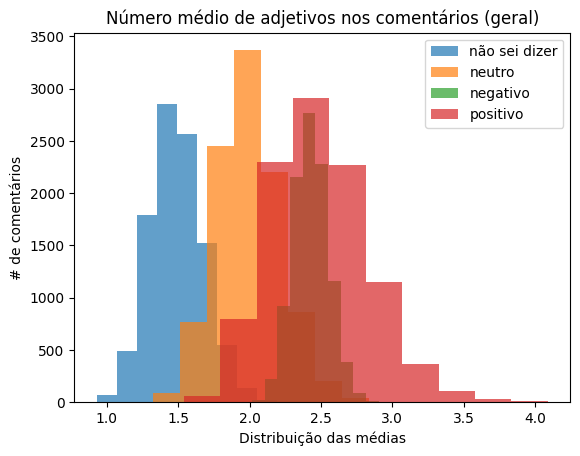

In [ ]:
plt.hist(adj_bootstrap_ci_ns.bootstrap_distribution, alpha=0.7, label='não sei dizer')
plt.hist(adj_bootstrap_ci_neutro.bootstrap_distribution, alpha=0.7, label='neutro')
plt.hist(adj_bootstrap_ci_negativo.bootstrap_distribution, alpha=0.7, label='negativo')
plt.hist(adj_bootstrap_ci_positivo.bootstrap_distribution, alpha=0.7, label='positivo')

plt.title('Número médio de adjetivos nos comentários (geral)')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

In [ ]:
significance_level = 0.05

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_neutro_comments, adj_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 156767.0
P-value: 2.593951509168014e-10
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_neutro_comments, adj_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 56901.0
P-value: 0.0010348848603447776
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_neutro_comments, adj_dis_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 38605.0
P-value: 0.019620619669211883
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_dis_comments, adj_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 90322.5
P-value: 0.015524355178597841
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_dis_comments, adj_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 32566.0
P-value: 0.5784758010315153
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(adj_positivo_comments, adj_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 141401.5
P-value: 0.035682458724878234
Is significant? True


##### NOUN

In [ ]:
noun_neutro_comments = comments_df[comments_df['class_result'] == 0]['noun_count']
noun_negativo_comments = comments_df[comments_df['class_result'] == -1]['noun_count']
noun_positivo_comments = comments_df[comments_df['class_result'] == 1]['noun_count']
noun_ns_comments = comments_df[comments_df['class_result'] == 10]['noun_count']
noun_dis_comments = comments_df[comments_df['class_result'] == -10]['noun_count']

In [ ]:
noun_bootstrap_ci_neutro = st.bootstrap(
    (noun_neutro_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

noun_bootstrap_ci_negativo = st.bootstrap(
    (noun_negativo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

noun_bootstrap_ci_positivo = st.bootstrap(
    (noun_positivo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

noun_bootstrap_ci_ns = st.bootstrap(
    (noun_ns_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

noun_bootstrap_ci_dis = st.bootstrap(
    (noun_dis_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

In [ ]:
noun_bootstrap_ci_dis.bootstrap_distribution.mean()

3.9083346429881085

In [ ]:
noun_bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=3.242857142857143, high=4.671428571428572)

In [ ]:
noun_bootstrap_ci_ns.bootstrap_distribution.mean()

1.9560259823450699

In [ ]:
noun_bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=1.379746835443038, high=2.6455696202531644)

In [ ]:
noun_bootstrap_ci_neutro.bootstrap_distribution.mean()

3.7589996287764373

In [ ]:
noun_bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=3.2397094430992737, high=4.329418886198545)

In [ ]:
noun_bootstrap_ci_negativo.bootstrap_distribution.mean()


4.679286782844951

In [ ]:
noun_bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=4.31453125, high=5.059427083333333)

In [ ]:
noun_bootstrap_ci_positivo.bootstrap_distribution.mean()

4.606454375845108

In [ ]:
noun_bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=3.7365203761755494, high=5.658307210031348)

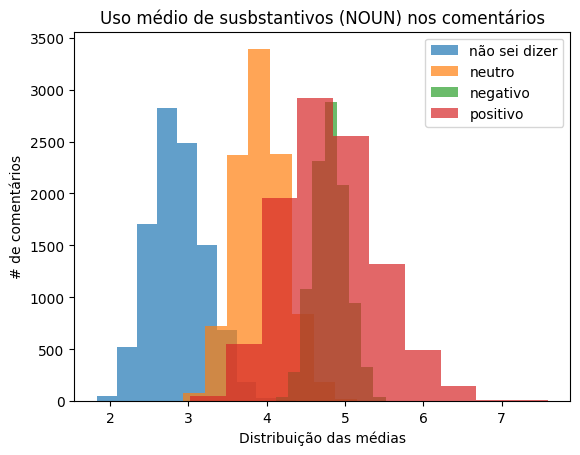

In [ ]:
plt.hist(noun_bootstrap_ci_ns.bootstrap_distribution, alpha=0.7, label='não sei dizer')
plt.hist(noun_bootstrap_ci_neutro.bootstrap_distribution, alpha=0.7, label='neutro')
plt.hist(noun_bootstrap_ci_negativo.bootstrap_distribution, alpha=0.7, label='negativo')
plt.hist(noun_bootstrap_ci_positivo.bootstrap_distribution, alpha=0.7, label='positivo')

plt.title('Uso médio de susbstantivos (NOUN) nos comentários')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_neutro_comments, noun_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 163132.5
P-value: 1.4120554378624876e-07
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_neutro_comments, noun_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 62239.5
P-value: 0.1939673970544734
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_neutro_comments, noun_dis_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 41493.0
P-value: 0.37095534217688064
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_dis_comments, noun_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 86909.0
P-value: 0.0015631148752353393
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_dis_comments, noun_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 33050.5
P-value: 0.7935099404351083
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(noun_positivo_comments, noun_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 134765.5
P-value: 0.001184464055104564
Is significant? True


##### VERB

In [ ]:
verb_neutro_comments = comments_df[comments_df['class_result'] == 0]['verb_count']
verb_negativo_comments = comments_df[comments_df['class_result'] == -1]['verb_count']
verb_positivo_comments = comments_df[comments_df['class_result'] == 1]['verb_count']
verb_ns_comments = comments_df[comments_df['class_result'] == 10]['verb_count']
verb_dis_comments = comments_df[comments_df['class_result'] == -10]['verb_count']

In [ ]:
verb_bootstrap_ci_neutro = st.bootstrap(
    (verb_neutro_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

verb_bootstrap_ci_negativo = st.bootstrap(
    (verb_negativo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

verb_bootstrap_ci_positivo = st.bootstrap(
    (verb_positivo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

verb_bootstrap_ci_ns = st.bootstrap(
    (verb_ns_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

verb_bootstrap_ci_dis = st.bootstrap(
    (verb_dis_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

In [ ]:
verb_bootstrap_ci_dis.bootstrap_distribution.mean()

3.16015839679206

In [ ]:
verb_bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=2.6092857142857153, high=3.7714285714285714)

In [ ]:
verb_bootstrap_ci_ns.bootstrap_distribution.mean()

1.7149639014534366

In [ ]:
verb_bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=1.0886075949367089, high=2.518987341772152)

In [ ]:
verb_bootstrap_ci_neutro.bootstrap_distribution.mean()

2.993792115289011

In [ ]:
verb_bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=2.5811138014527844, high=3.4285714285714284)

In [ ]:
verb_bootstrap_ci_negativo.bootstrap_distribution.mean()

4.025201791012435

In [ ]:
verb_bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=3.6822916666666665, high=4.383333333333334)

In [ ]:
verb_bootstrap_ci_positivo.bootstrap_distribution.mean()

4.298145488530044

In [ ]:
verb_bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=3.448119122257054, high=5.329153605015674)

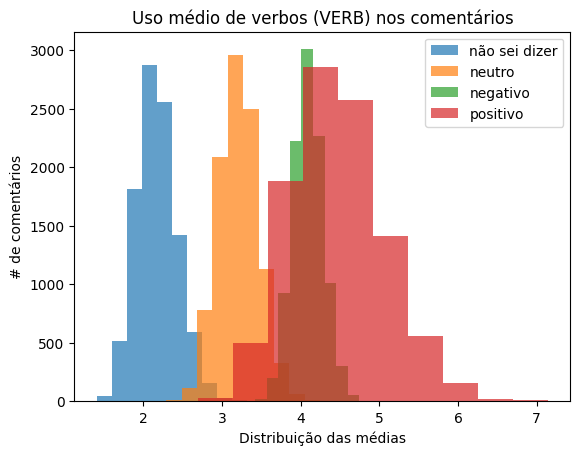

In [ ]:
plt.hist(verb_bootstrap_ci_ns.bootstrap_distribution, alpha=0.7, label='não sei dizer')
plt.hist(verb_bootstrap_ci_neutro.bootstrap_distribution, alpha=0.7, label='neutro')
plt.hist(verb_bootstrap_ci_negativo.bootstrap_distribution, alpha=0.7, label='negativo')
plt.hist(verb_bootstrap_ci_positivo.bootstrap_distribution, alpha=0.7, label='positivo')

plt.title('Uso médio de verbos (VERB) nos comentários')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_neutro_comments, verb_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 165497.5
P-value: 8.725197189628584e-07
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_neutro_comments, verb_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 60996.5
P-value: 0.08085975206029355
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_neutro_comments, verb_dis_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 41659.0
P-value: 0.41432355121449904
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_dis_comments, verb_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 88165.5
P-value: 0.003956698862502497
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_dis_comments, verb_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 32222.0
P-value: 0.45311574541228905
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(verb_positivo_comments, verb_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 140525.0
P-value: 0.02585749286984299
Is significant? True


#### N-gram analysis

In [ ]:
comments_df['cleaned_comment_v2'].dropna(inplace=True)

In [ ]:
comments_df['cleaned_comment_v2'] = comments_df['cleaned_comment_v2'].astype(str)

In [ ]:
len(comments_df)

1981

In [ ]:
neutro_comments = comments_df[comments_df['class_result'] == 0]['cleaned_comment_v2'].tolist()
negativo_comments = comments_df[comments_df['class_result'] == -1]['cleaned_comment_v2'].tolist()
positivo_comments = comments_df[comments_df['class_result'] == 1]['cleaned_comment_v2'].tolist()
ns_comments = comments_df[comments_df['class_result'] == 10]['cleaned_comment_v2'].tolist()
dis_comments = comments_df[comments_df['class_result'] == -10]['cleaned_comment_v2'].tolist()

In [ ]:
# Define n for n-grams
n = 2

# Function to extract n-grams from a list of comments
def extract_ngrams(comment_list, n):
    all_ngrams = []
    for comment in comment_list:
        tokens = nltk.word_tokenize(comment.lower())
        ngrams_list = list(nltk.ngrams(tokens, n))
        all_ngrams.extend(ngrams_list)
    return all_ngrams

# Extract n-grams for toxic and neutral comments
neutro_ngrams = extract_ngrams(neutro_comments, n)
negativo_ngrams = extract_ngrams(negativo_comments, n)
positivo_ngrams = extract_ngrams(positivo_comments, n)
ns_ngrams = extract_ngrams(ns_comments, n)
dis_ngrams = extract_ngrams(dis_comments, n)



# Calculate the frequency of each n-gram
neutro_ngram_freq = Counter(neutro_ngrams)
negativo_ngram_freq = Counter(negativo_ngrams)
positivo_ngram_freq = Counter(positivo_ngrams)
ns_ngram_freq = Counter(ns_ngrams)
dis_ngram_freq = Counter(dis_ngrams)

In [ ]:
neutro_2g_10_n = neutro_ngram_freq.most_common(10)
negativo_2g_10_n = negativo_ngram_freq.most_common(10)
positivo_2g_10_n = positivo_ngram_freq.most_common(10)
ns_2g_10_n = ns_ngram_freq.most_common(10)
dis_2g_10_n = dis_ngram_freq.most_common(10)

#tuplas dos 10 mais comuns
tuplas_neutro2 = [x[0] for x in neutro_2g_10_n]
tuplas_negativo2 = [x[0] for x in negativo_2g_10_n]
tuplas_positivo2 = [x[0] for x in positivo_2g_10_n]
tuplas_ns2 = [x[0] for x in ns_2g_10_n]
tuplas_dis2 = [x[0] for x in dis_2g_10_n]

#n-gramas por comentário
valores_neutro_c2 = [x[1]/len(neutro_comments) for x in neutro_2g_10_n]
valores_negativo_c2 = [x[1]/len(negativo_comments) for x in negativo_2g_10_n]
valores_positivo_c2 = [x[1]/len(positivo_comments) for x in positivo_2g_10_n]
valores_ns_c2 = [x[1]/len(ns_comments) for x in ns_2g_10_n]
valores_dis_c2 = [x[1]/len(dis_comments) for x in dis_2g_10_n]


dic_2_gramas_neutro_c = { 'tuplas': tuplas_neutro2, 'Média': valores_neutro_c2}
dic_2_gramas_negativo_c = { 'tuplas': tuplas_negativo2, 'Média': valores_negativo_c2}
dic_2_gramas_positivo_c = { 'tuplas': tuplas_positivo2, 'Média': valores_positivo_c2}
dic_2_gramas_ns_c = { 'tuplas': tuplas_ns2, 'Média': valores_ns_c2}
dic_2_gramas_dis_c = { 'tuplas': tuplas_dis2, 'Média': valores_dis_c2}


df_2_gramas_neutro_c = pd.DataFrame(dic_2_gramas_neutro_c)
df_2_gramas_negativo_c = pd.DataFrame(dic_2_gramas_negativo_c)
df_2_gramas_positivo_c = pd.DataFrame(dic_2_gramas_positivo_c)
df_2_gramas_ns_c = pd.DataFrame(dic_2_gramas_ns_c)
df_2_gramas_dis_c = pd.DataFrame(dic_2_gramas_dis_c)

In [ ]:


caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/xlsx/2-gramas.xlsx'
writer = pd.ExcelWriter(caminho_arquivo, engine='openpyxl')


with pd.ExcelWriter(caminho_arquivo, engine='openpyxl') as writer:
    df_2_gramas_neutro_c.to_excel(writer, index=False, sheet_name='Neutros_por_Cometario')
    df_2_gramas_negativo_c.to_excel(writer, index=False, sheet_name='Negativos_por_Cometario')
    df_2_gramas_positivo_c.to_excel(writer, index=False, sheet_name='Positivos_por_2gramas')
    df_2_gramas_ns_c.to_excel(writer, index=False, sheet_name='NS_por_2gramas')
    df_2_gramas_dis_c.to_excel(writer, index=False, sheet_name='DIS_por_2gramas')




#### Sentence complexity

In [ ]:
# Function to calculate the Type-Token Ratio (TTR) for a given comment
def calculate_ttr(comment):
    tokens = nltk.word_tokenize(comment.lower())
    types = set(tokens)
    print(tokens)
    print(types)
    print(len(types) / len(tokens))
    return len(types) / len(tokens)

In [ ]:
"bosta bolo bolo chao"

'bosta bolo bolo chao'

In [ ]:
calculate_ttr("bosta bolo bolo chao")

['bosta', 'bolo', 'bolo', 'chao']
{'bosta', 'chao', 'bolo'}
0.75


0.75

In [ ]:
comments_df['comment_ttr'] = comments_df['cleaned_comment_v2'].apply(lambda c: calculate_ttr(c))

In [ ]:
x = comments_df[comments_df['comment_len'] > 0]

In [ ]:
comments_df[comments_df['comment_len'] <= 0]

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,comment_len,comment_ttr


In [ ]:
comments_df.groupby('class_result').agg({'comment_ttr': ['mean', 'median']})

comment_ttr       
                    mean median
class_result                   
-10             0.967889    1.0
-1              0.965851    1.0
 0              0.947862    1.0
 1              0.948045    1.0
 10             0.959830    1.0

In [ ]:
sttr_neutro_comments = comments_df[comments_df['class_result'] == 0]['comment_ttr']
sttr_negativo_comments = comments_df[comments_df['class_result'] == -1]['comment_ttr']
sttr_positivo_comments = comments_df[comments_df['class_result'] == 1]['comment_ttr']
sttr_ns_comments = comments_df[comments_df['class_result'] == 10]['comment_ttr']
sttr_dis_comments = comments_df[comments_df['class_result'] == -10]['comment_ttr']

In [ ]:
sttr_bootstrap_ci_neutro = st.bootstrap(
    (sttr_neutro_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

sttr_bootstrap_ci_negativo = st.bootstrap(
    (sttr_negativo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

sttr_bootstrap_ci_positivo = st.bootstrap(
    (sttr_positivo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

sttr_bootstrap_ci_ns = st.bootstrap(
    (sttr_ns_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

sttr_bootstrap_ci_dis = st.bootstrap(
    (sttr_dis_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

In [ ]:
sttr_bootstrap_ci_dis.bootstrap_distribution.mean()

0.9746335854855183

In [ ]:
sttr_bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=0.965695039897028, high=0.9824958562906135)

In [ ]:
sttr_bootstrap_ci_ns.bootstrap_distribution.mean()

0.9801547171690901

In [ ]:
sttr_bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=0.9645956181041488, high=0.9928759249067449)

In [ ]:
sttr_bootstrap_ci_neutro.bootstrap_distribution.mean()

0.9688482931076815

In [ ]:
sttr_bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=0.9616010929158622, high=0.9754308958326079)

In [ ]:
sttr_bootstrap_ci_negativo.bootstrap_distribution.mean()

0.968824715792472

In [ ]:
sttr_bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=0.9646909471390166, high=0.972790100595699)

In [ ]:
sttr_bootstrap_ci_positivo.bootstrap_distribution.mean()

0.9740473769914485

In [ ]:
sttr_bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=0.9679017478506536, high=0.9798239675465132)

In [ ]:
plt.hist(sttr_bootstrap_ci_neutral.bootstrap_distribution, alpha=0.7, label='neutral')
plt.hist(sttr_bootstrap_ci_toxic.bootstrap_distribution, alpha=0.7, label='toxic')

plt.title('Complexidade média das sentenças nos comentários')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

NameError: name 'sttr_bootstrap_ci_neutral' is not defined

In [ ]:
significance_level

0.05

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_dis_comments, sttr_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 106512.5
P-value: 0.09486795421989659
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_dis_comments, sttr_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 34463.5
P-value: 0.44709416742528996
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_dis_comments, sttr_neutro_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 44820.0
P-value: 0.35623921883180154
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_dis_comments, sttr_ns_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 7461.0
P-value: 0.05111028549630999
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_neutro_comments, sttr_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 202720.0
P-value: 0.39008026305759713
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_neutro_comments, sttr_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 65465.0
P-value: 0.8487646931898783
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_ns_comments, sttr_neutro_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 18430.5
P-value: 0.011895611515378502
Is significant? True


In [ ]:

statistic, p_value = st.mannwhitneyu(sttr_ns_comments, sttr_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 43715.5
P-value: 0.0032474475477479127
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_ns_comments, sttr_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 14207.5
P-value: 0.01477450967012728
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(sttr_positivo_comments, sttr_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 157634.0
P-value: 0.30814827235761777
Is significant? False


In [ ]:
 significance_level

0.05

In [ ]:
calculate_interval(comments_df, "comment_ttr")

subreddit: futebol neutral CI: ConfidenceInterval(low=0.9238305047434286, high=0.9272656223364661) - toxic CI: ConfidenceInterval(low=0.9119947596720381, high=0.9211076401750229)
subreddit: desabafos neutral CI: ConfidenceInterval(low=0.8791069832606533, high=0.8829707746310431) - toxic CI: ConfidenceInterval(low=0.8432428779289074, high=0.8542808966452493)
subreddit: eu_nvr neutral CI: ConfidenceInterval(low=0.9315497432479449, high=0.9417730546017641) - toxic CI: ConfidenceInterval(low=0.9066382660988567, high=0.9305228570524243)
subreddit: brasilivre neutral CI: ConfidenceInterval(low=0.8959285947215974, high=0.8996829022847117) - toxic CI: ConfidenceInterval(low=0.8701164732323567, high=0.879810946232131)
subreddit: brasil neutral CI: ConfidenceInterval(low=0.8853906208778701, high=0.8883100073265279) - toxic CI: ConfidenceInterval(low=0.8625315980234147, high=0.8713247017486954)
subreddit: conversas neutral CI: ConfidenceInterval(low=0.8820465217744093, high=0.8893771516513035) - 

#### Sintax complexity

In [ ]:
neutral_comments_list = comments_df[comments_df['toxico'] == 0]['text'].tolist()
toxic_comments_list = comments_df[comments_df['toxico'] == 1]['text'].tolist()

In [ ]:
def analyze_comment(comment):
    doc = nlp(comment)

    pos_count = {}
    total_tokens = 0

    for token in doc:
        pos = token.pos_
        if pos in pos_count:
            pos_count[pos] += 1
        else:
            pos_count[pos] = 1
        total_tokens += 1

    pos_percentage = {pos: count / total_tokens for pos, count in pos_count.items()}
    return pos_percentage

def analyze_comments(comment_list):
    all_pos_percentage = {}

    for idx, comment in enumerate(comment_list):
        # print(f"Analyzing comment {idx + 1}...")
        pos_percentage = analyze_comment(comment)

        for pos, percentage in pos_percentage.items():
            if pos in all_pos_percentage:
                all_pos_percentage[pos].append(percentage)
            else:
                all_pos_percentage[pos] = [percentage]

    avg_pos_percentage = {
        pos: sum(percentages) / len(percentages) for pos, percentages in all_pos_percentage.items()
    }

    return avg_pos_percentage

In [ ]:
# Neutral comments
neutral_avg_pos_percentage = analyze_comments(neutral_comments_list)

for pos, percentage in sorted(neutral_avg_pos_percentage.items(), key=lambda x: x[1], reverse=True):
    print(f"{pos}: {percentage:.3f}")

NOUN: 0.189
VERB: 0.161
PROPN: 0.149
PUNCT: 0.143
ADP: 0.121
ADV: 0.113
DET: 0.109
PRON: 0.101
ADJ: 0.089
AUX: 0.080
X: 0.073
SCONJ: 0.067
INTJ: 0.064
CCONJ: 0.060
NUM: 0.060
SPACE: 0.042
SYM: 0.040
PART: 0.037


In [ ]:
# Toxic comments
avg_pos_percentage = analyze_comments(toxic_comments_list)

for pos, percentage in sorted(avg_pos_percentage.items(), key=lambda x: x[1], reverse=True):
    print(f"{pos}: {percentage:.3f}")

NOUN: 0.193
VERB: 0.155
PUNCT: 0.128
PROPN: 0.115
ADP: 0.110
DET: 0.104
ADV: 0.091
PRON: 0.090
ADJ: 0.077
AUX: 0.075
SCONJ: 0.060
CCONJ: 0.054
SPACE: 0.039
X: 0.039
NUM: 0.039
INTJ: 0.038
SYM: 0.023
PART: 0.013


#### POS tags diversity

In [ ]:
def calculate_pos_ratio(comment):
    doc = nlp(comment)
    tag_counts = set([token.pos_ for token in doc])
    total_tokens = len(doc)
    pos_ratio = 0

    pos_ratio = len(tag_counts) / total_tokens


    return pos_ratio

In [ ]:
comments_df['pos_tag_diversity'] = comments_df['cleaned_comment_v2'].apply(lambda c: calculate_pos_ratio(c))

In [ ]:
comments_df.groupby('class_result').agg({'pos_tag_diversity': ['mean', 'median']})

pos_tag_diversity          
                          mean    median
class_result                            
-10                   0.574557  0.563492
-1                    0.495660  0.444444
 0                    0.575127  0.500000
 1                    0.556015  0.500000
 10                   0.728986  0.750000

In [ ]:
pos_tag_neutro_comments = comments_df[comments_df['class_result'] == 0]['pos_tag_diversity']
pos_tag_negativo_comments = comments_df[comments_df['class_result'] == -1]['pos_tag_diversity']
pos_tag_positivo_comments = comments_df[comments_df['class_result'] == 1]['pos_tag_diversity']
pos_tag_ns_comments = comments_df[comments_df['class_result'] == 10]['pos_tag_diversity']
pos_tag_dis_comments = comments_df[comments_df['class_result'] == -10]['pos_tag_diversity']

In [ ]:
pos_bootstrap_ci_neutro = st.bootstrap(
    (pos_tag_neutro_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

pos_bootstrap_ci_negativo = st.bootstrap(
    (pos_tag_negativo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)


pos_bootstrap_ci_positivo = st.bootstrap(
    (pos_tag_positivo_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

pos_bootstrap_ci_ns = st.bootstrap(
    (pos_tag_ns_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

pos_bootstrap_ci_dis = st.bootstrap(
    (pos_tag_dis_comments.tolist(),),
    np.mean,
    batch=1000,
    confidence_level=0.95,
    random_state=1,
    method='percentile'
)

In [ ]:
pos_bootstrap_ci_dis.bootstrap_distribution.mean()

0.5744905285918767

In [ ]:
pos_bootstrap_ci_dis.confidence_interval

ConfidenceInterval(low=0.5357971381349632, high=0.6132612428761283)

In [ ]:
pos_bootstrap_ci_ns.bootstrap_distribution.mean()

0.7284296278677858

In [ ]:
pos_bootstrap_ci_ns.confidence_interval

ConfidenceInterval(low=0.664860897220556, high=0.7903108178741088)

In [ ]:
pos_bootstrap_ci_neutro.bootstrap_distribution.mean()

0.5749437455666464

In [ ]:
pos_bootstrap_ci_neutro.confidence_interval

ConfidenceInterval(low=0.5472294664651176, high=0.6025253237085632)

In [ ]:
pos_bootstrap_ci_negativo.bootstrap_distribution.mean()

0.49561997374560035

In [ ]:
pos_bootstrap_ci_negativo.confidence_interval

ConfidenceInterval(low=0.4788359639274086, high=0.5127786129915691)

In [ ]:
pos_bootstrap_ci_positivo.bootstrap_distribution.mean()

0.5560695146290632

In [ ]:
pos_bootstrap_ci_positivo.confidence_interval

ConfidenceInterval(low=0.522976696357251, high=0.5892101500026765)

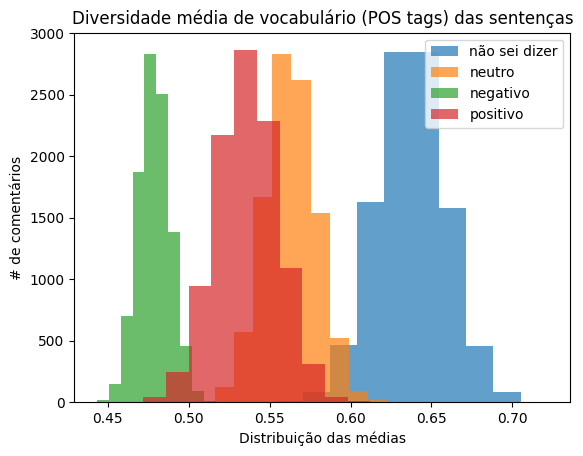

In [ ]:
plt.hist(pos_bootstrap_ci_ns.bootstrap_distribution, alpha=0.7, label='não sei dizer')
plt.hist(pos_bootstrap_ci_neutro.bootstrap_distribution, alpha=0.7, label='neutro')
plt.hist(pos_bootstrap_ci_negativo.bootstrap_distribution, alpha=0.7, label='negativo')
plt.hist(pos_bootstrap_ci_positivo.bootstrap_distribution, alpha=0.7, label='positivo')

plt.title('Diversidade média de vocabulário (POS tags) das sentenças')
plt.xlabel('Distribuição das médias')
plt.ylabel('# de comentários')
plt.legend()
plt.show()

In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_ns_comments, pos_tag_neutro_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 21132.0
P-value: 2.595301313550713e-05
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_ns_comments, pos_tag_dis_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 10745.5
P-value: 8.930253074964495e-05
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_dis_comments, pos_tag_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 116703.0
P-value: 0.00032465644866981966
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_dis_comments, pos_tag_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 34918.0
P-value: 0.4051541861000676
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_dis_comments, pos_tag_neutro_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 43396.5
P-value: 0.9882705297112256
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_neutro_comments, pos_tag_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 229121.5
P-value: 4.26167251008852e-06
Is significant? True


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_neutro_comments, pos_tag_positivo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 68596.5
P-value: 0.3337361194789986
Is significant? False


In [ ]:
# Perform the Mann-Whitney U test
statistic, p_value = st.mannwhitneyu(pos_tag_positivo_comments, pos_tag_negativo_comments)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < significance_level}")

Mann-Whitney U statistic: 169421.5
P-value: 0.004228175711439436
Is significant? True


#### KS test

In [ ]:
# Prepare the data for Kolmogorov-Smirnov Test
# Since Kolmogorov-Smirnov Test requires 1D data, we'll use the cumulative sum of POS tag counts
toxic_cumulative_counts = np.cumsum(list(toxic_pos_counts.values()))
neutral_cumulative_counts = np.cumsum(list(neutral_pos_counts.values()))

# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = ks_2samp(
    toxic_cumulative_counts,
    neutral_cumulative_counts
)

print("\nKolmogorov-Smirnov Test:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
print(f"Is significant? => {ks_p_value < significance_level}")


Kolmogorov-Smirnov Test:
KS Statistic: 0.9444444444444444
P-value: 7.933766012281933e-09
Is significant? => True


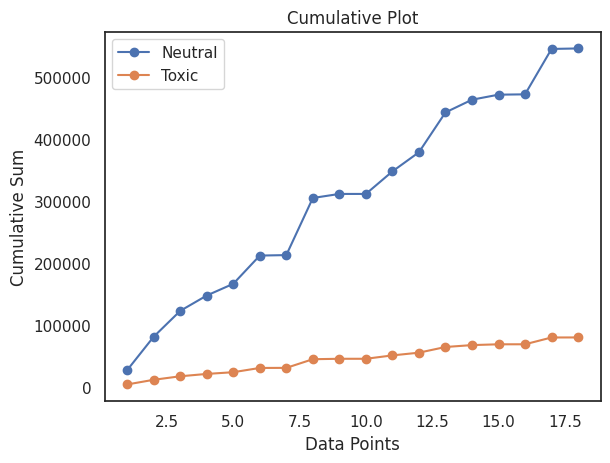

In [ ]:
sns.set(style='white')
plt.plot(range(1, len(neutral_cumulative_counts) + 1), neutral_cumulative_counts, label='Neutral', marker='o')
plt.plot(range(1, len(toxic_cumulative_counts) + 1), toxic_cumulative_counts, label='Toxic', marker='o')

plt.xlabel('Data Points')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.title('Cumulative Plot')
plt.show()

In [ ]:
def calculate_cdf(tag_list):
    # Calculate the frequency of each tag
    tag_freq = Counter(tag_list)

    # Sort the tags alphabetically
    sorted_tags = sorted(tag_freq.keys())

    # Calculate the cumulative sum of tag frequencies
    cumulative_freq = [tag_freq[tag] for tag in sorted_tags]
    cumulative_freq = [sum(cumulative_freq[:i + 1]) for i in range(len(cumulative_freq))]

    # Calculate the CDF by normalizing cumulative frequencies
    cdf = [freq / cumulative_freq[-1] for freq in cumulative_freq]

    return sorted_tags, cdf

In [ ]:
sorted_neutral_tags, neutral_cdf = calculate_cdf(neutral_pos_tags)
sorted_toxic_tags, toxic_cdf = calculate_cdf(toxic_pos_tags)

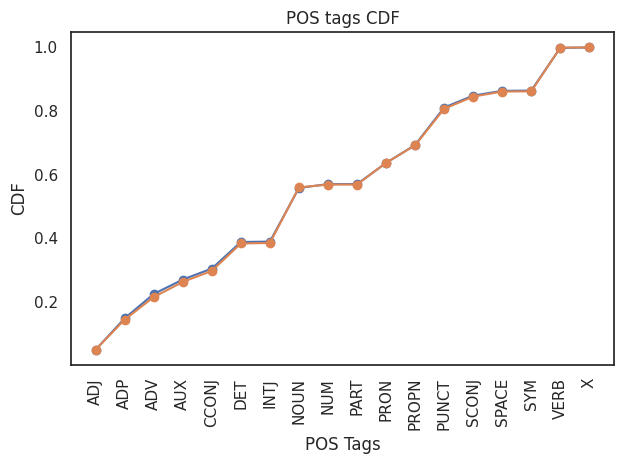

In [ ]:
sns.set(style='white')
plt.plot(sorted_neutral_tags, neutral_cdf, marker='o')
plt.plot(sorted_toxic_tags, toxic_cdf, marker='o')

plt.xlabel('POS Tags')
plt.ylabel('CDF')
plt.title('POS tags CDF')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####further about NER

##### NER top 10

In [ ]:
comments_df[comments_df['class_result'] == 10]

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,comment_len
6,6,hrs3n3y,"Putz, se bobeasse tava escrevendo isso no r/fa...",10,10,0,10,0,putz bobeasse tava escrevendo r farialimabets,45
35,35,hv8eqh4,"Discordo, pra mim é 2020-too, 2020 segunda tem...",10,10,1,10,0,discordo mim temporada ova transição,36
48,48,hwns0af,"Scheiß auf den Krieg, heute ist ein Tag des Ve...",10,-1,10,10,0,scheiß auf den krieg heute ist ein tag vergnüg...,328
83,83,i00lucc,ora ora se não é macho🗿📸,10,10,0,10,0,macho,5
105,105,i2nnw1u,Uma das bem dada,10,10,0,10,0,dada,4
...,...,...,...,...,...,...,...,...,...,...
1312,312,ip36xqp,É zueira até o momento q irmã comer o cool dela,-1,10,10,10,0,zueira irmã comer cool,22
1373,373,iu3oek3,nosso o Jair tem vantagem.\n\nA velharada tá f...,-1,10,10,10,0,jair vantagem velharada fechada,31
1385,385,iuhhy06,Mensalão 2.0,-1,10,10,10,0,mensalão,8
1418,418,ivzpq7l,Mandioca... Sei!,10,10,1,10,0,mandioca,8


In [ ]:
neutro_comments = comments_df[comments_df['class_result'] == 0]['cleaned_comment_v2'].tolist()
negativo_comments = comments_df[comments_df['class_result'] == -1]['cleaned_comment_v2'].tolist()
positivo_comments = comments_df[comments_df['class_result'] == 1]['cleaned_comment_v2'].tolist()
ns_comments = comments_df[comments_df['class_result'] == 10]['cleaned_comment_v2'].tolist()
dis_comments = comments_df[comments_df['class_result'] == -10]['cleaned_comment_v2'].tolist()

In [ ]:
all_comments = comments_df['cleaned_comment_v2'].tolist()

In [ ]:
len(all_comments)

1981

In [ ]:
ns_comments

['putz bobeasse tava escrevendo r farialimabets',
 'discordo mim temporada ova transição',
 'scheiß auf den krieg heute ist ein tag vergnügens união sinistra im blut ich dass die witzbolde von grosser tuchel gegen diese frechen brasilianer mit einem scheißdreck machen den keiner hält ich freue mich darauf die engländer gegen diese kinder gewinnen zu sehen und die weinen zu sehen fußballland du oma guten tag sub ist es',
 'macho',
 'dada',
 'like see exp mixed people translation said ask mean cause idea',
 'minutos passaram ninguem viu monstro nasceu algum brasil',
 'né buceta buceta',
 'foda mano',
 'chegou leão né leão gt tigre',
 'view removal request video',
 'ex tj digo paraíso merece gente bata porta domingo manhã pregar',
 'visitar parente coração tocar vuvuzela basta colocar cano longo boca',
 'fala',
 'beber apagar solito',
 'curti dupla personalidade hehe',
 'hola comosta',
 'atrasado tomar dose',
 'anda pelado drone aparecer gira pirocóptero piroca girar igual hélice',
 'simo

In [ ]:
def analyze_pos_distribution_text(text_corpus):
    # Process the text corpus with the Portuguese language model
    docs = list(nlp.pipe(text_corpus))

    # Initialize a counter to count the occurrences of each POS tag
    pos_counter_verb = collections.Counter()
    pos_counter_noun = collections.Counter()
    pos_counter_adj = collections.Counter()

    # Count the occurrences of each POS tag in the corpus
    for doc in docs:
        for token in doc:
          if token.pos_ == 'VERB':
            pos_counter_verb[token.text] += 1
          elif token.pos_ == 'NOUN':
            pos_counter_noun[token.text] += 1
          elif token.pos_ == 'ADJ':
            pos_counter_adj[token.text] += 1

    return {'VERB': pos_counter_verb.most_common(10), 'NOUN': pos_counter_noun.most_common(10), 'ADJ': pos_counter_adj.most_common(20)}

In [ ]:
def entidades(text_list):

  contar_org_entidades = Counter()
  contar_per_entidades = Counter()
  contar_loc_entidades = Counter()
  contar_misc_entidades = Counter()


  for text in text_list:
    doc = nlp(text)
    for ent in doc.ents:
          if ent.label_ == 'ORG':
            contar_org_entidades[ent.text] += 1
          elif ent.label_ == 'PER':
            contar_per_entidades[ent.text] += 1
          elif ent.label_ == 'LOC':
            contar_loc_entidades[ent.text] += 1
          elif ent.label_ == 'MISC':
            contar_misc_entidades[ent.text] += 1

  return {'PER': contar_per_entidades.most_common(20), 'LOC': contar_loc_entidades.most_common(10), 'ORG': contar_org_entidades.most_common(10), 'MISC': contar_misc_entidades.most_common(10)}


In [ ]:
def entidades2(text_list):

  contar_entidades = Counter()

  for text in text_list:
    doc = nlp(text)
    for ent in doc.ents:
          contar_entidades[ent.text] += 1

  return contar_entidades.most_common(20)

In [ ]:
entidades2(ns_comments)

[('brasil', 3),
 ('putz', 1),
 ('r farialimabets', 1),
 ('ich dass die witzbolde von grosser tuchel', 1),
 ('mit einem scheißdreck machen den keiner hält ich freue mich darauf die engländer',
  1),
 ('kinder gewinnen', 1),
 ('sehen und die weinen zu sehen fußballland', 1),
 ('like see exp mixed people translation said ask mean', 1),
 ('leão né', 1),
 ('tj digo paraíso', 1),
 ('curti', 1),
 ('simone tebet', 1),
 ('assacinin squid', 1),
 ('gabriel jesus', 1),
 ('gt jesus emoji', 1),
 ('diniz gabriel jesus emoji', 1),
 ('olha piu piu menino', 1),
 ('papagaio pirata picolé xuxu', 1),
 ('alemanha', 1),
 ('argentina', 1)]

In [ ]:
result_pos_text = entidades(neutro_comments)
per_neu = ', '.join([word for word, count in result_pos_text['PER']])
loc_neu = ', '.join([word for word, count in result_pos_text['LOC']])
org_neu = ', '.join([word for word, count in result_pos_text['ORG']])
misc_neu = ', '.join([word for word, count in result_pos_text['MISC']])

In [ ]:
result_pos_text = entidades(negativo_comments)
per_neg = ', '.join([word for word, count in result_pos_text['PER']])
loc_neg = ', '.join([word for word, count in result_pos_text['LOC']])
org_neg = ', '.join([word for word, count in result_pos_text['ORG']])
misc_neg = ', '.join([word for word, count in result_pos_text['MISC']])

In [ ]:
result_pos_text = entidades(positivo_comments)
per_p = ', '.join([word for word, count in result_pos_text['PER']])
loc_p = ', '.join([word for word, count in result_pos_text['LOC']])
org_p = ', '.join([word for word, count in result_pos_text['ORG']])
misc_p = ', '.join([word for word, count in result_pos_text['MISC']])

In [ ]:
result_pos_text = entidades(ns_comments)
per_ns = ', '.join([word for word, count in result_pos_text['PER']])
loc_ns = ', '.join([word for word, count in result_pos_text['LOC']])
org_ns = ', '.join([word for word, count in result_pos_text['ORG']])
misc_ns = ', '.join([word for word, count in result_pos_text['MISC']])

In [ ]:
result_pos_text

{'PER': [('r farialimabets', 1),
  ('kinder gewinnen', 1),
  ('leão né', 1),
  ('simone tebet', 1),
  ('assacinin squid', 1),
  ('gabriel jesus', 1),
  ('gt jesus emoji', 1),
  ('diniz gabriel jesus emoji', 1),
  ('stop count', 1),
  ('redpilled based', 1),
  ('calvão matador', 1),
  ('wilton pereira sampaio', 1),
  ('hubiese', 1),
  ('haberle', 1),
  ('spook engris', 1),
  ('newman lm', 1),
  ('lula', 1),
  ('vitinho intensifies', 1),
  ('flaco lópez', 1),
  ('joe jack', 1)],
 'LOC': [('brasil', 3),
  ('tj digo paraíso', 1),
  ('alemanha', 1),
  ('bulança', 1),
  ('mercedez', 1),
  ('sapecarão', 1)],
 'ORG': [('putz', 1),
  ('ich dass die witzbolde von grosser tuchel', 1),
  ('mit einem scheißdreck machen den keiner hält ich freue mich darauf die engländer',
   1),
  ('argentina', 1),
  ('aki', 1),
  ('vasco', 1),
  ('sampay', 1)],
 'MISC': [('sehen und die weinen zu sehen fußballland', 1),
  ('like see exp mixed people translation said ask mean', 1),
  ('curti', 1),
  ('olha piu piu 

In [ ]:
dic_text = {'Classificação': ['Negativo', 'Neutro', 'Positivo', '"Não sei dizer"'], 'PER': [per_neg, per_neu, per_p, per_ns], 'LOC': [loc_neg, loc_neu, loc_p, loc_ns],
            'ORG': [org_neg, org_neu, org_p, org_ns], 'MISC': [misc_neg, misc_neu, misc_p, misc_ns]}

In [ ]:
[per_neg, per_neu, per_p, per_ns]

['lula, neymar, zelensky, lula bolsonaro, ciro, sus, ederson, brasil lula, furry, paulo guedes, bobão, paulo, uber, trikas brega, enem neném edit award, vamos bozo, mano lucas lima, disney, zoeira, kim katacoquinho',
 'lula, hitler, lula bolsonaro, dilma, poxa, ivermin, netflix, putin, john, allan, achei roberto leal, rogério tech, horus heresy, david luiz descabecado, casemiro, paulo, janones coringa, barsi, pl, pl barsi',
 'alexandre, lula gov, eita poxa, narci mom, neymar, lacrasine luisa, api rest, xandao, robert langdon, adom, isis lovia, bostonaro, bach lieder ohne worte mendelssohn kyriale igreja católica motetos maravilhosos, orlando di imaginei, olha terapia sexologa, olavo, lula, sus ortopedista, alberto valentim salvar brás, rueda',
 'r farialimabets, kinder gewinnen, leão né, simone tebet, assacinin squid, gabriel jesus, gt jesus emoji, diniz gabriel jesus emoji, stop count, redpilled based, calvão matador, wilton pereira sampaio, hubiese, haberle, spook engris, newman lm, 

In [ ]:
df_text = pd.DataFrame(dic_text)
df_text

,Classificação,PER,LOC,ORG,MISC
0,Negativo,"lula, neymar, zelensky, lula bolsonaro, ciro, ...","brasil, rússia, bolsonaro, eua, gt, china, ucr...","bozo, pt, putz, corinthians, otan eua ordem mu...","steam, diabo youtube, youtube, internet, mcdon..."
1,Neutro,"lula, hitler, lula bolsonaro, dilma, poxa, ive...","brasil, alemanha, eua, italia, arana, hiroshim...","corinthians, pt, flamengo, war united states r...","big brother antropologia, plot twist vdd roger..."
2,Positivo,"alexandre, lula gov, eita poxa, narci mom, ney...","brasil, rio janeiro, américa, mineiro, rua ola...","inter, corinthians, agr santos, collab heim ps...","youtube, tals, martirizei, entao la, reforma p..."
3,"""Não sei dizer""","r farialimabets, kinder gewinnen, leão né, sim...","brasil, tj digo paraíso, alemanha, bulança, me...","putz, ich dass die witzbolde von grosser tuche...","sehen und die weinen zu sehen fußballland, lik..."


In [ ]:
!pip install openpyxl
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/xlsx/df_pos_comuns_ner.xlsx', engine='openpyxl') as writer:
    df_text.to_excel(writer, index=False, sheet_name='comuns')

In [ ]:
# if ent.label_ in ['PER', 'ORG', 'GPE']
def calculate_ner_frequency(text_list):
    ner_counts = {}
    for text in text_list:
        doc = nlp(text)
        for ent in doc.ents:
            ner_label = ent.label_
            ner_counts[ner_label] = ner_counts.get(ner_label, 0) + 1
    return ner_counts

In [ ]:
# All comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_frequency(dis_comments)
total = sum([y for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])
print( [(x, y/total * 100)  for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])

[('PER', 42.201834862385326), ('LOC', 28.440366972477065), ('MISC', 15.59633027522936), ('ORG', 13.761467889908257)]


In [ ]:
comments_df[comments_df['class_result'] == 10]['Comentário'].tolist()

NameError: name 'comments_df' is not defined

In [ ]:
total

109

In [ ]:
ner_frequency.items()

dict_items([('LOC', 31), ('ORG', 15), ('PER', 46), ('MISC', 17)])

In [ ]:
# All comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_frequency(ns_comments)
total = sum([y for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])
print( [(x, y)  for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])

[('PER', 22), ('LOC', 8), ('ORG', 7), ('MISC', 6)]


In [ ]:
total

43

In [ ]:
ner_frequency.items()

dict_items([('ORG', 7), ('PER', 22), ('MISC', 6), ('LOC', 8)])

In [ ]:
# All comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_frequency(neutro_comments)
total = sum([y for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])
print( [(x, y/total * 100)  for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])

[('PER', 42.64150943396226), ('LOC', 25.28301886792453), ('ORG', 16.22641509433962), ('MISC', 15.849056603773585)]


In [ ]:
total

265

In [ ]:
# Toxic comdments
ner_frequency = calculate_ner_frequency(negativo_comments)
total = sum([y for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])
print( [(x, y/total * 100) for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])

[('PER', 43.7847866419295), ('LOC', 35.25046382189239), ('ORG', 11.50278293135436), ('MISC', 9.461966604823747)]


In [ ]:
ner_frequency = calculate_ner_frequency(positivo_comments)
total = sum([y for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])
print( [(x, y/total * 100) for (x, y) in sorted(ner_frequency.items(), key=(lambda x: x[1]), reverse=True)])

[('PER', 40.0), ('LOC', 24.285714285714285), ('MISC', 24.285714285714285), ('ORG', 11.428571428571429)]


In [ ]:
ner_frequency.items()

dict_items([('PER', 56), ('LOC', 34), ('MISC', 34), ('ORG', 16)])

##### NER tokens

In [ ]:
# if ent.label_ in ['PER', 'ORG', 'GPE']
def calculate_name_ner(text_list):
    ner_counts = {}
    for text in text_list:
        doc = nlp(text)
        for ent in doc.ents:
            ner_text = ent.text
            ner_label = ent.label_
            if ner_text in ner_counts:
                ner_counts[ner_text][ner_label] = ner_counts[ner_text].get(ner_label, 0) + 1
            else:
                ner_counts[ner_text] = {ner_label: 1}
    return ner_counts

In [ ]:
ner_frequency = calculate_ner_tag_frequency(ns_comments)

In [ ]:
# if ent.label_ in ['PER', 'ORG', 'GPE']
def calculate_ner_tag_frequency(text_list):
    ner_counts = {}
    for text in text_list:
        doc = nlp(text)
        for ent in doc.ents:
            ner_text = ent.text
            ner_label = ent.label_
            if ner_text in ner_counts:
                ner_counts[ner_text][ner_label] = ner_counts[ner_text].get(ner_label, 0) + 1
            else:
                ner_counts[ner_text] = {ner_label: 1}
    return ner_counts

In [ ]:
# All comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_tag_frequency(ns_comments)
sorted(ner_frequency.items(), key=lambda x: sum(x[1].values()), reverse=True)[:15]

[('brasil', {'LOC': 3}),
 ('putz', {'ORG': 1}),
 ('r farialimabets', {'PER': 1}),
 ('ich dass die witzbolde von grosser tuchel', {'ORG': 1}),
 ('mit einem scheißdreck machen den keiner hält ich freue mich darauf die engländer',
  {'ORG': 1}),
 ('kinder gewinnen', {'PER': 1}),
 ('sehen und die weinen zu sehen fußballland', {'MISC': 1}),
 ('like see exp mixed people translation said ask mean', {'MISC': 1}),
 ('leão né', {'PER': 1}),
 ('tj digo paraíso', {'LOC': 1}),
 ('curti', {'MISC': 1}),
 ('simone tebet', {'PER': 1}),
 ('assacinin squid', {'PER': 1}),
 ('gabriel jesus', {'PER': 1}),
 ('gt jesus emoji', {'PER': 1})]

In [ ]:
# Neutral comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_tag_frequency(neutral_comments_list)
sorted(ner_frequency.items(), key=lambda x: sum(x[1].values()), reverse=True)[:20]

[('Brasil', {'LOC': 114}),
 ('brasil', {'LOC': 105}),
 ('Bolsonaro', {'PER': 25, 'ORG': 28, 'LOC': 11}),
 ('Lula', {'PER': 58}),
 ('lula', {'PER': 33}),
 ('bolsonaro', {'PER': 4, 'LOC': 21, 'ORG': 2}),
 ('flamengo', {'ORG': 24, 'LOC': 2}),
 ('Ciro', {'PER': 23}),
 ('PT', {'ORG': 21}),
 ('Flamengo', {'ORG': 19}),
 ('OP', {'LOC': 6, 'MISC': 1, 'ORG': 11, 'PER': 1}),
 ('entao', {'LOC': 16, 'MISC': 1, 'PER': 1}),
 ('internet', {'MISC': 17}),
 ('gt', {'ORG': 15, 'LOC': 1}),
 ('Vou', {'MISC': 15}),
 ('youtube', {'MISC': 14}),
 ('eua', {'LOC': 14}),
 ('Palmeiras', {'ORG': 13, 'LOC': 1}),
 ('pc', {'MISC': 13}),
 ('bozo', {'ORG': 12, 'MISC': 1})]

In [ ]:
# Toxic comments
# Call the function to get NER frequency
ner_frequency = calculate_ner_tag_frequency(toxic_comments_list)
sorted(ner_frequency.items(), key=lambda x: sum(x[1].values()), reverse=True)[:20]

[('Bolsonaro', {'LOC': 4, 'PER': 13, 'ORG': 17}),
 ('Lula', {'PER': 31}),
 ('Brasil', {'LOC': 30}),
 ('lula', {'PER': 24}),
 ('brasil', {'LOC': 16}),
 ('bolsonaro', {'LOC': 13}),
 ('OP', {'ORG': 4, 'LOC': 8}),
 ('PT', {'ORG': 10}),
 ('Puta', {'PER': 8}),
 ('EUA', {'LOC': 8}),
 ('Mano', {'PER': 8}),
 ('Caralho', {'LOC': 5, 'MISC': 2}),
 ('Argentina', {'LOC': 6}),
 ('Maluco', {'PER': 6}),
 ('pqp', {'ORG': 6}),
 ('ciro', {'PER': 5}),
 ('bozo', {'ORG': 5}),
 ('Jesus', {'PER': 5}),
 ('internet', {'MISC': 5}),
 ('STF', {'LOC': 5})]

In [ ]:
# NEUTRAL comments
for subreddit in comments_df['subreddit'].unique():
  neutral_comments = comments_df[
      (comments_df['subreddit'] == subreddit) &
      (comments_df['is_toxic'] == 0)
  ]['comment'].tolist()

  ner_frequency = calculate_ner_frequency(neutral_comments)

  print(f'Subreddit: {subreddit} \n NER tags: {ner_frequency}\n')

Subreddit: futebol 
 NER tags: {'MISC': 4114, 'ORG': 6447, 'PER': 6911, 'LOC': 5132}

Subreddit: desabafos 
 NER tags: {'PER': 2384, 'LOC': 2213, 'MISC': 2957, 'ORG': 1416}

Subreddit: eu_nvr 
 NER tags: {'MISC': 575, 'PER': 363, 'ORG': 209, 'LOC': 398}

Subreddit: brasilivre 
 NER tags: {'PER': 4710, 'MISC': 3941, 'ORG': 2959, 'LOC': 5595}

Subreddit: brasil 
 NER tags: {'LOC': 10715, 'ORG': 6157, 'PER': 9220, 'MISC': 8670}

Subreddit: investimentos 
 NER tags: {'MISC': 810, 'LOC': 640, 'ORG': 730, 'PER': 333}

Subreddit: botecodoreddit 
 NER tags: {'MISC': 380, 'ORG': 101, 'LOC': 179, 'PER': 147}

Subreddit: conversas 
 NER tags: {'MISC': 2022, 'PER': 946, 'ORG': 735, 'LOC': 856}

Subreddit: saopaulo 
 NER tags: {'LOC': 978, 'PER': 278, 'MISC': 455, 'ORG': 258}

Subreddit: tiodopave 
 NER tags: {'ORG': 11, 'PER': 27, 'LOC': 26, 'MISC': 18}



In [ ]:
# TOXIC comments
for subreddit in comments_df['subreddit'].unique():
  neutral_comments = comments_df[
      (comments_df['subreddit'] == subreddit) &
      (comments_df['is_toxic'] == 1)
  ]['comment'].tolist()

  ner_frequency = calculate_ner_frequency(neutral_comments)

  print(f'Subreddit: {subreddit} \n NER tags: {ner_frequency}\n')

Subreddit: futebol 
 NER tags: {'PER': 906, 'ORG': 828, 'MISC': 601, 'LOC': 661}

Subreddit: desabafos 
 NER tags: {'PER': 548, 'MISC': 540, 'ORG': 274, 'LOC': 390}

Subreddit: eu_nvr 
 NER tags: {'PER': 72, 'ORG': 23, 'MISC': 67, 'LOC': 38}

Subreddit: brasilivre 
 NER tags: {'LOC': 924, 'PER': 975, 'MISC': 790, 'ORG': 556}

Subreddit: brasil 
 NER tags: {'PER': 1243, 'ORG': 705, 'LOC': 1131, 'MISC': 927}

Subreddit: investimentos 
 NER tags: {'PER': 34, 'MISC': 34, 'ORG': 40, 'LOC': 26}

Subreddit: botecodoreddit 
 NER tags: {'MISC': 23, 'LOC': 29, 'PER': 20, 'ORG': 18}

Subreddit: conversas 
 NER tags: {'MISC': 120, 'PER': 82, 'LOC': 42, 'ORG': 54}

Subreddit: saopaulo 
 NER tags: {'PER': 22, 'ORG': 20, 'MISC': 20, 'LOC': 37}

Subreddit: tiodopave 
 NER tags: {'MISC': 1, 'PER': 1, 'LOC': 1}



In [ ]:
# NEUTRAL comments
for subreddit in comments_df['subreddit'].unique():
  neutral_comments = comments_df[
      (comments_df['subreddit'] == subreddit) &
      (comments_df['is_toxic'] == 0)
  ]['comment'].tolist()

  ner_frequency = calculate_ner_tag_frequency(neutral_comments)
  sorted_ner = sorted(
      ner_frequency.items(), key=lambda x: sum(x[1].values()),
      reverse=True
  )[:20]

  print(f'Subreddit: {subreddit} \n NER tags: {sorted_ner}\n')

Subreddit: futebol 
 NER tags: [('Flamengo', {'ORG': 448}), ('Brasil', {'LOC': 382}), ('Palmeiras', {'ORG': 347, 'LOC': 4}), ('Corinthians', {'ORG': 279}), ('Santos', {'ORG': 138, 'LOC': 32}), ('Vasco', {'ORG': 145, 'PER': 7}), ('São Paulo', {'ORG': 78, 'LOC': 71}), ('Neymar', {'PER': 135}), ('Libertadores', {'MISC': 128}), ('Argentina', {'LOC': 119}), ('Copa', {'MISC': 115}), ('Inter', {'ORG': 113}), ('Grêmio', {'ORG': 105}), ('Cruzeiro', {'ORG': 102, 'LOC': 1}), ('Botafogo', {'ORG': 99, 'LOC': 3}), ('Messi', {'PER': 97, 'ORG': 2}), ('Galo', {'ORG': 98, 'LOC': 1}), ('flamengo', {'ORG': 83, 'PER': 1}), ('França', {'LOC': 83}), ('libertadores', {'MISC': 82})]

Subreddit: desabafos 
 NER tags: [('OP', {'LOC': 148, 'ORG': 74, 'MISC': 13, 'PER': 13}), ('Brasil', {'LOC': 143}), ('Deus', {'PER': 109, 'MISC': 6}), ('Mano', {'PER': 109}), ('Vou', {'MISC': 83}), ('Reddit', {'ORG': 49, 'MISC': 1, 'PER': 2}), ('Vc', {'ORG': 19, 'PER': 27, 'MISC': 1}), ('Me', {'MISC': 47}), ('Sinto', {'LOC': 44}),

In [ ]:
# TOXIC comments
for subreddit in comments_df['subreddit'].unique():
  neutral_comments = comments_df[
      (comments_df['subreddit'] == subreddit) &
      (comments_df['is_toxic'] == 1)
  ]['comment'].tolist()

  ner_frequency = calculate_ner_tag_frequency(neutral_comments)
  sorted_ner = sorted(
      ner_frequency.items(), key=lambda x: sum(x[1].values()),
      reverse=True
  )[:20]

  print(f'Subreddit: {subreddit} \n NER tags: {sorted_ner}\n')

Subreddit: futebol 
 NER tags: [('Palmeiras', {'ORG': 45}), ('Flamengo', {'ORG': 45}), ('Brasil', {'LOC': 44}), ('Neymar', {'PER': 29}), ('Corinthians', {'ORG': 27}), ('Galo', {'ORG': 25}), ('Argentina', {'LOC': 24, 'ORG': 1}), ('Porra', {'PER': 22}), ('Tite', {'ORG': 4, 'PER': 17}), ('Caralho', {'MISC': 6, 'LOC': 14}), ('Abel', {'PER': 18}), ('pqp', {'ORG': 16, 'PER': 1}), ('flamengo', {'ORG': 15}), ('Copa', {'MISC': 15}), ('Puta', {'PER': 13}), ('Messi', {'PER': 12}), ('Botafogo', {'ORG': 11, 'LOC': 1}), ('Santos', {'ORG': 11, 'LOC': 1}), ('Vasco', {'ORG': 12}), ('Grêmio', {'ORG': 12})]

Subreddit: desabafos 
 NER tags: [('Mano', {'PER': 36}), ('OP', {'ORG': 11, 'MISC': 2, 'LOC': 14, 'PER': 2}), ('Deus', {'PER': 19, 'MISC': 1}), ('Brasil', {'LOC': 18}), ('Porra', {'PER': 16}), ('Foda', {'PER': 14}), ('Caralho', {'LOC': 10, 'MISC': 2}), ('ngm', {'PER': 11}), ('Vc', {'ORG': 4, 'PER': 6}), ('Vou', {'MISC': 10}), ('Kkkkk', {'PER': 8, 'LOC': 1}), ('Lula', {'PER': 8, 'ORG': 1}), ('mlk', {'

##### NER over time

In [ ]:
all_comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/csv/comments_data_v1.csv')

<ipython-input-28-411a94a5c7b3>:1: DtypeWarning: Columns (11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  all_comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/csv/comments_data_v1.csv')


In [ ]:
all_comments.head(2)
all_comments = all_comments[['id', 'subreddit', 'created_utc', 'created_month']]

In [ ]:
merge_df = pd.merge(comments_df, all_comments, how='left', on='id')

In [ ]:
len(merge_df)

1981

In [ ]:
merge_df

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,comment_len,ner_count,subreddit,created_utc,created_month
0,0,hr39bh3,"Olha, vou falar sobre a minha experiência. Fui...",-1,-1,-1,-1,1,olha vou experiência privilegiado educação ens...,274,0,brasil,1.641228e+09,1.0
1,1,hr4zdgd,Intervencionismo externo visando ganho próprio...,-1,-1,-1,-1,1,intervencionismo externo visando ganho estudar...,118,0,brasil,1.641252e+09,1.0
2,2,hr673em,AWS é vida!! Hehehe\nUso e recomendo o todos o...,1,1,1,1,1,aws vida hehehe uso recomendo clientes ti,41,0,investimentos,1.641270e+09,1.0
3,3,hrd2klr,"Se fosse assim, quem morrer de parada cardíaca...",-1,-1,0,-1,0,morrer parada cardíaca tomou vacina poderia tomou,49,0,brasilivre,1.641396e+09,1.0
4,4,hrflhlt,"Em momentos como o atual, tomar medidas de pre...",1,-1,-1,-1,0,momentos atual tomar medidas precaução custam ...,170,0,brasil,1.641431e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,494,j1irv6h,Oloco cara a calça jeans fica fedida e sebosa ...,-1,-1,-1,-1,1,oloco calça jeans fica fedida sebosa troca por...,70,1,brasil,1.671906e+09,12.0
1977,496,j1rpqpg,"O exército vermelho era foda, pai! Os Snipers ...",1,-1,1,1,0,exército vermelho foda pai snipers excelência,45,1,brasil,1.672091e+09,12.0
1978,497,j21u2z0,"Oushe, se você sustenta sua mãe, ela não tem p...",10,-1,0,-10,0,oushe sustenta mãe problemas irem ficante baru...,66,1,desabafos,1.672277e+09,12.0
1979,498,j24w0rk,"Porra Muzzy, depois que eu vi o jeito que ele ...",-1,-1,-1,-1,1,porra muzzy vi jeito responde pessoal reclama ...,131,2,brasil,1.672337e+09,12.0


In [ ]:
neutro_comments = merge_df[merge_df['class_result'] == 0]
negativo_comments = merge_df[merge_df['class_result'] == -1]
positivo_comments = merge_df[merge_df['class_result'] == 1]

In [ ]:
mes_comments = [merge_df[merge_df['created_month'] == x] for x in range(1, 13)]
mes_neutro_comments = [neutro_comments[neutro_comments['created_month'] == x] for x in range(1, 13)]
mes_negativo_comments = [negativo_comments[negativo_comments['created_month'] == x] for x in range(1, 13)]
mes_positivo_comments = [positivo_comments[positivo_comments['created_month'] == x] for x in range(1, 13)]

In [ ]:
def entidades(df):
  contar_tipos_entidades = Counter()
  contar_nome_entidades = Counter()
  for comment in df['cleaned_comment_v2']:
    doc = nlp(comment.lower())
    for entidade in doc.ents:
        contar_tipos_entidades[entidade.label_] += 1
        contar_nome_entidades[entidade.text] += 1
  return {'Mes': df['created_month'].iloc[0], 'quant_total_entidades': sum(contar_tipos_entidades.values()), 'entidades_contagem': contar_tipos_entidades,
          'nomes_entidades_contagem': [(nome, contagem) for nome, contagem in contar_nome_entidades.items()]}

ner_comments = [entidades(df) for df in  mes_comments]
ner_neutro_comments = [entidades(df) for df in  mes_neutro_comments]
ner_negativo_comments = [entidades(df) for df in  mes_negativo_comments]
ner_positivo_comments = [entidades(df) for df in  mes_positivo_comments]

In [ ]:
def tipo_ner_mes (ner_comments,  mes_comments):

  dic_mes_tipo = {'Tipo': ['PER', 'LOC', 'ORG', 'MISC']}

  lista_tipos = ['PER', 'LOC', 'ORG', 'MISC']

  for i, mes in enumerate(ner_comments, start=1):
      mes_label = f'Mês {i}'
      ner_counts_mes = ner_comments[i - 1]['entidades_contagem']
      ner_ratio_mes = [ner_counts_mes[x] / len(mes_comments[i - 1]) for x in lista_tipos]
      dic_mes_tipo[mes_label] = ner_ratio_mes
  return dic_mes_tipo

In [ ]:
dic_tipo_ner_all = tipo_ner_mes(ner_comments, mes_comments)
dic_tipo_ner_neutro = tipo_ner_mes(ner_comments, mes_comments)
dic_tipo_ner_negativo = tipo_ner_mes(ner_negativo_comments, mes_negativo_comments)
dic_tipo_ner_positivo = tipo_ner_mes(ner_positivo_comments, mes_positivo_comments)

In [ ]:
df_tipo_ner_all = pd.DataFrame(dic_tipo_ner_all)
df_tipo_ner_neutro = pd.DataFrame(dic_tipo_ner_neutro)
df_tipo_ner_negativo = pd.DataFrame(dic_tipo_ner_negativo)
df_tipo_ner_positivo = pd.DataFrame(dic_tipo_ner_positivo)


In [ ]:
!pip install openpyxl


In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/xlsx/df_ner_mes_tipo.xlsx', engine='openpyxl') as writer:
    df_tipo_ner_all.to_excel(writer, index=False, sheet_name='tipo_entidades_all')
    df_tipo_ner_neutro.to_excel(writer, index=False, sheet_name='tipo_entidades_neutro')
    df_tipo_ner_negativo.to_excel(writer, index=False, sheet_name='tipo_entidades_negativo')
    df_tipo_ner_positivo.to_excel(writer, index=False, sheet_name='tipo_entidades_positivo')

In [ ]:
def organizar (ner, mes):
    return sorted(ner[mes]['nomes_entidades_contagem'], key=lambda x: x[1], reverse=True)

In [ ]:
ner_comments

[{'Mes': 1.0,
  'quant_total_entidades': 61,
  'entidades_contagem': Counter({'ORG': 5, 'PER': 26, 'MISC': 8, 'LOC': 22}),
  'nomes_entidades_contagem': [('putz', 1),
   ('r farialimabets', 1),
   ('big brother antropologia', 1),
   ('alexandre', 1),
   ('rio janeiro', 1),
   ('china', 4),
   ('brasil', 7),
   ('trikas brega', 1),
   ('enem neném edit award', 1),
   ('vamos bozo', 1),
   ('paulo', 1),
   ('eua', 1),
   ('eren cuck', 1),
   ('naruto', 1),
   ('hokage', 1),
   ('covid', 3),
   ('steve bannon', 1),
   ('usb click mouse', 1),
   ('ney edit', 2),
   ('gt', 2),
   ('benfica', 2),
   ('crystal palace b', 2),
   ('crystal palace', 2),
   ('skkdkdksk', 2),
   ('caraca velhinho mundo', 2),
   ('estados unidos', 2),
   ('ps olha', 2),
   ('bejo tchau', 2),
   ('brasil qie', 2),
   ('oligopolio globo', 2),
   ('askreddit', 2),
   ('gt internet', 2),
   ('alemanha', 2),
   ('pl simone', 2)]},
 {'Mes': 2.0,
  'quant_total_entidades': 74,
  'entidades_contagem': Counter({'LOC': 28, '

In [ ]:
def nome_ner_mes (ner_comments,  mes_comments):

  dic_mes_nome = {'Relevância': [x for x in range(1, 4)]}

  for i, mes in enumerate(ner_comments, start=1):
      mes_label = f'Mês {i}'
      ner_ratio_mes = [x for x in organizar(ner_comments, i - 1)][:3]
      dic_mes_nome[mes_label] = ner_ratio_mes
  return dic_mes_nome

In [ ]:
dic_nome_ner_all = nome_ner_mes(ner_comments, mes_comments)
dic_nome_ner_neutro = nome_ner_mes(ner_comments, mes_comments)
dic_nome_ner_negativo = nome_ner_mes(ner_negativo_comments, mes_negativo_comments)
dic_nome_ner_positivo = nome_ner_mes(ner_positivo_comments, mes_positivo_comments)

In [ ]:
df_nome_ner_all = pd.DataFrame(dic_nome_ner_all)
df_nome_ner_neutro = pd.DataFrame(dic_nome_ner_neutro)
df_nome_ner_negativo = pd.DataFrame(dic_nome_ner_negativo)
df_nome_ner_positivo = pd.DataFrame(dic_nome_ner_positivo)

In [ ]:
df_nome_ner_all

,Relevância,Mês 1,Mês 2,Mês 3,Mês 4,Mês 5,Mês 6,Mês 7,Mês 8,Mês 9,Mês 10,Mês 11,Mês 12
0,1,"(brasil, 7)","(brasil, 3)","(italia, 4)","(lula, 5)","(brasil, 5)","(brasil, 6)","(brasil, 5)","(brasil, 4)","(ciro, 5)","(lula, 10)","(lula, 7)","(brasil, 6)"
1,2,"(china, 4)","(lazarento, 2)","(rússia, 3)","(bozo, 5)","(rússia, 3)","(gt, 3)","(márcia estádio, 2)","(hitler, 4)","(brasil, 4)","(brasil, 9)","(los angeles, 6)","(lula, 2)"
2,3,"(covid, 3)","(flamengo, 2)","(aham eleições, 2)","(brasil, 5)","(rouanet, 3)","(bolsonaro, 2)","(mim pizza doce, 2)","(pô op, 2)","(eua, 4)","(bolsonaro, 4)","(dilma, 4)","(uber, 2)"


In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/IC/Trabalho-webmidia/xlsx/df_ner_mes_nome.xlsx', engine='openpyxl') as writer:
    df_nome_ner_all.to_excel(writer, index=False, sheet_name='nome_entidades_all')
    df_nome_ner_neutro.to_excel(writer, index=False, sheet_name='nome_entidades_neutro')
    df_nome_ner_negativo.to_excel(writer, index=False, sheet_name='nome_entidades_negativo')
    df_nome_ner_positivo.to_excel(writer, index=False, sheet_name='nome_entidades_positivo')

In [ ]:
!pip install pymannkendall

In [ ]:
from collections import defaultdict
import pymannkendall as mk

In [ ]:
merge_df

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,ner_count,subreddit,created_utc,created_month
0,0,hr39bh3,"Olha, vou falar sobre a minha experiência. Fui...",-1,-1,-1,-1,1,olha vou experiência privilegiado educação ens...,0,brasil,1.641228e+09,1.0
1,1,hr4zdgd,Intervencionismo externo visando ganho próprio...,-1,-1,-1,-1,1,intervencionismo externo visando ganho estudar...,0,brasil,1.641252e+09,1.0
2,2,hr673em,AWS é vida!! Hehehe\nUso e recomendo o todos o...,1,1,1,1,1,aws vida hehehe uso recomendo clientes ti,0,investimentos,1.641270e+09,1.0
3,3,hrd2klr,"Se fosse assim, quem morrer de parada cardíaca...",-1,-1,0,-1,0,morrer parada cardíaca tomou vacina poderia tomou,0,brasilivre,1.641396e+09,1.0
4,4,hrflhlt,"Em momentos como o atual, tomar medidas de pre...",1,-1,-1,-1,0,momentos atual tomar medidas precaução custam ...,0,brasil,1.641431e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,495,j1me21f,Win-win ao meu ver,0,1,1,1,0,,0,brasil,1.671985e+09,12.0
1996,496,j1rpqpg,"O exército vermelho era foda, pai! Os Snipers ...",1,-1,1,1,0,exército vermelho foda pai snipers excelência,1,brasil,1.672091e+09,12.0
1997,497,j21u2z0,"Oushe, se você sustenta sua mãe, ela não tem p...",10,-1,0,-10,0,oushe sustenta mãe problemas irem ficante baru...,1,desabafos,1.672277e+09,12.0
1998,498,j24w0rk,"Porra Muzzy, depois que eu vi o jeito que ele ...",-1,-1,-1,-1,1,porra muzzy vi jeito responde pessoal reclama ...,2,brasil,1.672337e+09,12.0


###### NER (overall) by month

In [ ]:
merge_df.groupby('created_month')['ner_count'].sum()

created_month
1.0      62
2.0      74
3.0      84
4.0      87
5.0      88
6.0      65
7.0      54
8.0      81
9.0     124
10.0    151
11.0    113
12.0    113
Name: ner_count, dtype: int64

In [ ]:
comments_neutros = merge_df[merge_df['class_result'] == 0]
comments_negativos = merge_df[merge_df['class_result'] == -1]
comments_positivos = merge_df[merge_df['class_result'] == 1]
comments_ns = merge_df[merge_df['class_result'] == 10]
#comments_dis = comments_df[comments_df['class_result'] == -10]

In [ ]:
comments_positivos

,Unnamed: 0,id,Comentário,class1,class2,class3,class_result,total_agreement,cleaned_comment_v2,ner_count,comment_len,subreddit,created_utc,created_month
2,2,hr673em,AWS é vida!! Hehehe\nUso e recomendo o todos o...,1,1,1,1,1,aws vida hehehe uso recomendo clientes ti,0,41,investimentos,1.641270e+09,1.0
14,14,hsncxtq,"A resposta, a meu entender, é que a sociedade ...",10,1,1,1,0,resposta entender sociedade vê casais homo nor...,0,182,brasilivre,1.642179e+09,1.0
16,16,ht9my53,Relações Internacionais.\n\nA base do curso é ...,1,-1,1,1,0,relações internacionais base curso história po...,2,1554,brasil,1.642561e+09,1.0
17,17,htfz11y,Outra sugestão: procure o perfil no Instagram ...,1,1,1,1,1,sugestão procure perfil instagram sebos abra a...,0,140,investimentos,1.642675e+09,1.0
23,23,hu1lat0,"Atualmente não, porque sou profissional de tec...",1,1,1,1,1,atualmente profissional tecnologia qualificaçã...,0,127,brasilivre,1.643046e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,468,izbw10v,"Ahh para, eu curto cidadezinha, as vezes eu vo...",1,1,1,1,1,ahh curto cidadezinha vou lugares fico dias su...,0,55,desabafos,1.670456e+09,12.0
1954,472,izjug33,NEYMARRRRRRR PORRAAAAAAAA,1,1,1,1,1,neymarrrrrrr porraaaaaaaa,1,25,futebol,1.670606e+09,12.0
1965,483,j0kxoll,como é bom ter democracia,1,1,1,1,1,democracia,0,10,brasilivre,1.671282e+09,12.0
1975,493,j1eglg1,"Porra, mano. Tu é foda. \n\nTô com inveja do b...",1,-1,1,1,0,porra mano foda tô inveja,0,25,brasil,1.671820e+09,12.0


In [ ]:
neutros = comments_neutros.groupby('created_month')['ner_count'].sum()
negativos = comments_negativos.groupby('created_month')['ner_count'].sum()
positivos = comments_positivos.groupby('created_month')['ner_count'].sum()
ns = comments_ns.groupby('created_month')['ner_count'].sum()

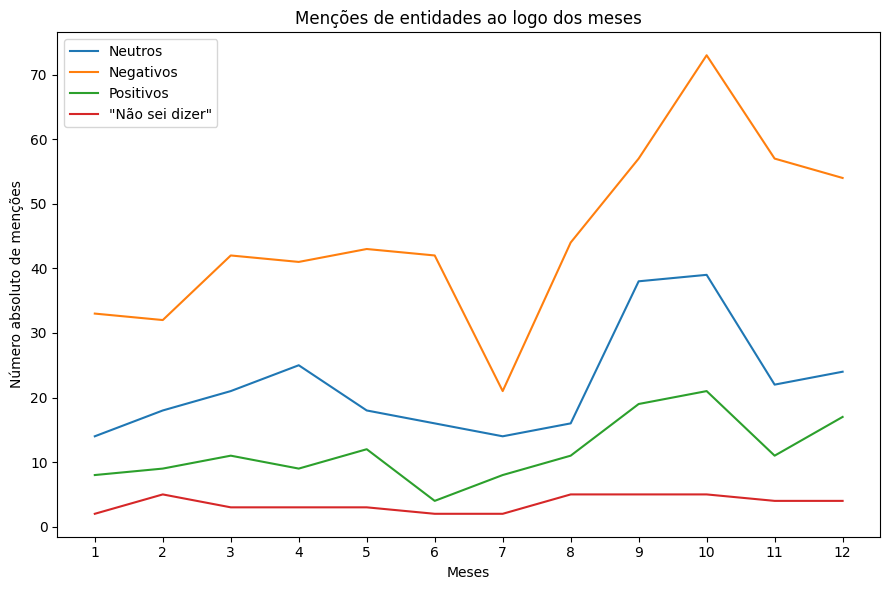

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(neutros.index, neutros.values, label='Neutros')
plt.plot(negativos.index, negativos.values, label='Negativos')
plt.plot(positivos.index, positivos.values, label='Positivos')
plt.plot(ns.index, ns.values, label='"Não sei dizer"')


plt.title('Menções de entidades ao logo dos meses')
plt.xlabel('Meses')
plt.ylabel('Número absoluto de menções')
plt.xticks(neutros.index)

plt.legend()
plt.tight_layout()
plt.show()

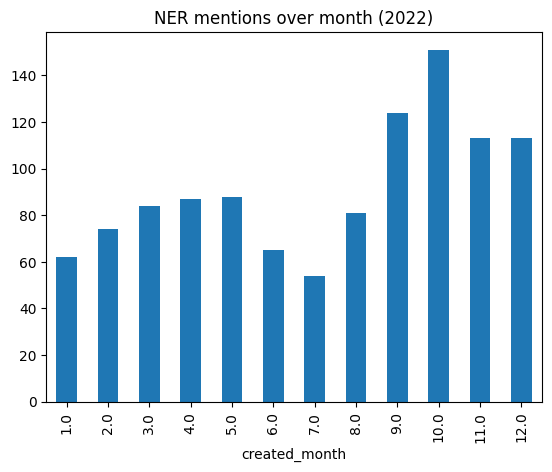

In [ ]:
merge_df.groupby('created_month')['ner_count'].sum().plot(kind='bar')
plt.title("NER mentions over month (2022)")
plt.show()

In [ ]:
ner_mentions = comments_df.groupby('created_month')['ner_count'].sum().tolist()

In [ ]:
result = mk.original_test(ner_mentions)

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[2]

In [ ]:
result

Mann_Kendall_Test(trend='increasing', h=True, p=0.003191966353548681, z=2.948619569692089, Tau=0.6666666666666666, s=44.0, var_s=212.66666666666666, slope=233.5409090909091, intercept=4498.525)

In [ ]:
# Define significance level (e.g., 0.05)
alpha = 0.05

print(f"Test statistic: {test_statistic}")
print(f"P-value: {p_value}")
print(f"Is significant? {p_value < alpha}")

Test statistic: increasing
P-value: 0.003191966353548681
Is significant? True
